In [1]:
from modules_main import *
# from old_modules.modules_fit import *
import json
import plotly.graph_objects as go
import numpy as np
import os
import pandas as pd

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


Carga de dataframes con clasificación de ajuste posible/no posible.

In [2]:
pth=os.getcwd()
pthreg=pth+'/../data/lineas_completas/REG.csv'
reg_posible=pd.read_csv(pthreg)
pthvdi=pth+'/../data/lineas_completas/VDI.csv'
vdi_posible=pd.read_csv(pthvdi)
pthxin=pth+'/../data/lineas_completas/XIN.csv'
xin_posible=pd.read_csv(pthxin)
reg=reg_posible.loc[reg_posible['Reconstrucción']=='Posible','Vano']
vdi=vdi_posible.loc[vdi_posible['Reconstrucción']=='Posible','Vano']
xin=xin_posible.loc[xin_posible['Reconstrucción']=='Posible','Vano']

FileNotFoundError: [Errno 2] No such file or directory: '/home/ubuntu-deduce/Projects/electra-ia/notebooks/../data/lineas_completas/REG.csv'

Generación de ajustes


Processing Vano 0

Reference G_13578462_13689863
First time 0.013545513153076172
Rotating vano
Cropping conductor
Umbral de corte superior detectado: -4587882.060554319
Umbral de corte superior detectado: -4587770.487469982
Analyzing conductor configuration
Third time 0.24246907234191895
Number of lines: 3
Fourth time 0.002500295639038086
Starting fit
Prefit data shape (3, 3827)
Applying spectral clustering


/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 1.8513290882110596
clustering time 2 0.001825094223022461
clustering time 1.8538250923156738
Fifth time 1.8584010601043701
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.5088244430868583, 0.9652111859492485
Fit Pearson R and Fit Spearman R for z coordinate: 0.8608704440421795, 0.8644368572090758
RmeanSE and RmaxSE error for z coordinate: 0.9997334384984505, 1.2775474680255545
Fit Pearson R and Fit Spearman R for z coordinate: 0.02308806337569954, -0.014730417088441293
RmeanSE and RmaxSE error for z coordinate: 0.9114862585196136, 1.5103519810463695
Fit Pearson R and Fit Spearman R for z coordinate: 0.41134120185785195, 0.7740740272385842
Sixth time 0.018300533294677734
Evaluating fit
Seventh time 0.005392551422119141
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13578462_13689863"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 0.24%"},"Error polil\u00ednea":{"0":45

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 9.16724443435669
clustering time 2 0.0017066001892089844
clustering time 9.16963505744934
Fifth time 9.173315525054932
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.941132155570915, 1.321515196207661
Fit Pearson R and Fit Spearman R for z coordinate: 0.3380388696529855, 0.36682459298211895
RmeanSE and RmaxSE error for z coordinate: 0.8536961214812809, 2.0119204170494376
Fit Pearson R and Fit Spearman R for z coordinate: 0.5207714779132258, 0.37931034482758613
RmeanSE and RmaxSE error for z coordinate: 0.5072347005882293, 1.1424927347103937
Fit Pearson R and Fit Spearman R for z coordinate: 0.8618079600992249, 0.8255131964809383
Sixth time 0.017238140106201172
Evaluating fit
Seventh time 0.005090236663818359
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13576773_13576897"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 0.15%"},"Error polil\u00ednea":{"0":2797850.971

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 5.340882778167725
clustering time 2 0.0015172958374023438
clustering time 5.3431925773620605
Fifth time 5.348782539367676
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.9284617668011658, 1.2644571255821042
Fit Pearson R and Fit Spearman R for z coordinate: 0.37143056160289767, 0.3763864828101783
RmeanSE and RmaxSE error for z coordinate: 0.873358165589834, 1.2541165667318572
Fit Pearson R and Fit Spearman R for z coordinate: 0.4870787466462625, 0.4741488104346335
RmeanSE and RmaxSE error for z coordinate: 0.032773113240138305, 0.11946609169028855
Fit Pearson R and Fit Spearman R for z coordinate: 0.9994628201912268, 0.9002801120448181
Sixth time 0.01804661750793457
Evaluating fit
Seventh time 0.004667758941650391
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13576773_13576774"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 0.11%"},"Error polil\u00ednea":{"0":279986

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 6.757859945297241
clustering time 2 0.001434326171875
clustering time 6.760099411010742
Fifth time 6.764700174331665
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.6066143610638357, 0.8778761466947147
Fit Pearson R and Fit Spearman R for z coordinate: 0.7950045872895587, 0.7569163723817407
RmeanSE and RmaxSE error for z coordinate: 0.5687982578669972, 1.3046973193520568
Fit Pearson R and Fit Spearman R for z coordinate: 0.8224770795022875, 0.805031890277444
RmeanSE and RmaxSE error for z coordinate: 0.9113520154708478, 1.2217884446381022
Fit Pearson R and Fit Spearman R for z coordinate: 0.4116279554861495, 0.4319432093677096
Sixth time 0.018624305725097656
Evaluating fit
Seventh time 0.005427122116088867
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13576907_13576908"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 0.10%"},"Error polil\u00ednea":{"0":2802395.050659

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


RmeanSE and RmaxSE error for z coordinate: 0.23834944782519257, 1.4778067289289105
Fit Pearson R and Fit Spearman R for z coordinate: 0.9712694477397916, 0.9410924526925681
RmeanSE and RmaxSE error for z coordinate: 0.15376609134691338, 0.49428324700051085
Fit Pearson R and Fit Spearman R for z coordinate: 0.9881919606529819, 0.9895095371294482
RmeanSE and RmaxSE error for z coordinate: 0.9779640680803822, 2.6400399183357504
Fit Pearson R and Fit Spearman R for z coordinate: 0.20877560015269625, 0.18193848587952596
Sixth time 0.01568007469177246
Evaluating fit
Seventh time 0.004632472991943359
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13578307_13578514"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 4.45%"},"Error polil\u00ednea":{"0":2340583.6839426667},"Error nuestro ajuste":{"0":1.421030567}}
Eigth time 0.004625558853149414

Processing Vano 6

Reference G_13578498_13578512
First time 0.0144162178039

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 0.30182933807373047
clustering time 2 0.001081228256225586
clustering time 0.3035907745361328
Fifth time 0.30629849433898926
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.10173392362461656, 0.19000865255385946
Fit Pearson R and Fit Spearman R for z coordinate: 0.9948116486244373, 0.9950504229353885
RmeanSE and RmaxSE error for z coordinate: 0.06415549118701731, 0.24617771270944622
Fit Pearson R and Fit Spearman R for z coordinate: 0.9979399155538489, 0.9976387397200501
RmeanSE and RmaxSE error for z coordinate: 0.03451418068707609, 0.11714506338555536
Fit Pearson R and Fit Spearman R for z coordinate: 0.9994042271887958, 0.9989791904415287
Sixth time 0.019974231719970703
Evaluating fit
Seventh time 0.004425525665283203
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13578498_13578512"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: -0.08%"},"Error polil\u00ednea":{"0

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 1.451167106628418
clustering time 2 0.0012621879577636719
clustering time 1.4531970024108887
Fifth time 1.4574308395385742
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.16858781489344674, 0.37174170630807546
Fit Pearson R and Fit Spearman R for z coordinate: 0.9857303044518742, 0.9815941398542033
RmeanSE and RmaxSE error for z coordinate: 0.3070068279693578, 0.6713358865978363
Fit Pearson R and Fit Spearman R for z coordinate: 0.9518444291258574, 0.9596765275830377
RmeanSE and RmaxSE error for z coordinate: 0.4378664770252396, 1.4176362802732803
Fit Pearson R and Fit Spearman R for z coordinate: 0.8990415893390153, 0.844001189624034
Sixth time 0.014915943145751953
Evaluating fit
Seventh time 0.005235195159912109
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13578435_13578450"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 0.16%"},"Error polil\u00ednea":{"0":708842

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 3.4462695121765137
clustering time 2 0.0010221004486083984
clustering time 3.4480555057525635
Fifth time 3.454298734664917
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.11730124176873236, 0.44279795429927304
Fit Pearson R and Fit Spearman R for z coordinate: 0.9931577712244607, 0.9803915037343186
RmeanSE and RmaxSE error for z coordinate: 0.11861464629767157, 0.44411357772429616
Fit Pearson R and Fit Spearman R for z coordinate: 0.992940372758532, 0.9889009763776456
RmeanSE and RmaxSE error for z coordinate: 0.14419574364959367, 0.387300381551424
Fit Pearson R and Fit Spearman R for z coordinate: 0.9896547236482539, 0.9978778657410947
Sixth time 0.04047679901123047
Evaluating fit
Seventh time 0.011412382125854492
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13578338_13578340"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 0.07%"},"Error polil\u00ednea":{"0":70995

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 3.612931966781616
clustering time 2 0.002105712890625
clustering time 3.615736484527588
Fifth time 3.6228079795837402
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.19877969387727204, 0.5407645714110705
Fit Pearson R and Fit Spearman R for z coordinate: 0.9800487630940256, 0.9081215719230661
RmeanSE and RmaxSE error for z coordinate: 0.09724164082014146, 0.2735482334002568
Fit Pearson R and Fit Spearman R for z coordinate: 0.995297337016347, 0.9985672446575501
RmeanSE and RmaxSE error for z coordinate: 0.02333620748177115, 0.0695823781379743
Fit Pearson R and Fit Spearman R for z coordinate: 0.9997276958034926, 0.9963828994943326
Sixth time 0.016261816024780273
Evaluating fit
Seventh time 0.005208730697631836
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13578470_13578521"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 0.00%"},"Error polil\u00ednea":{"0":4694515.44

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 4.683931350708008
clustering time 2 0.0014767646789550781
clustering time 4.685961008071899
Fifth time 4.688744068145752
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.08976665886989156, 0.12209493554109814
Fit Pearson R and Fit Spearman R for z coordinate: 0.9959628242527616, 0.9915065561136966
RmeanSE and RmaxSE error for z coordinate: 0.006103940715513632, 0.0224458634623399
Fit Pearson R and Fit Spearman R for z coordinate: 0.9999813708067696, 0.9999466955178409
RmeanSE and RmaxSE error for z coordinate: 0.5362599977865835, 1.2533756003218421
Fit Pearson R and Fit Spearman R for z coordinate: 0.8440528912451141, 0.8464285714285712
Sixth time 0.016268014907836914
Evaluating fit
Seventh time 0.004923820495605469
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13578475_13578503"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: -0.54%"},"Error polil\u00ednea":{"0":1189

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 2.8589425086975098
clustering time 2 0.0013298988342285156
clustering time 2.8608591556549072
Fifth time 2.8657684326171875
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.6081166071802694, 0.9296367495505558
Fit Pearson R and Fit Spearman R for z coordinate: 0.7938477466531886, 0.7896117457688532
RmeanSE and RmaxSE error for z coordinate: 0.6116230102045734, 0.8404594645598991
Fit Pearson R and Fit Spearman R for z coordinate: 0.7911493539302897, 0.7882494302631488
RmeanSE and RmaxSE error for z coordinate: 0.9849173522265355, 1.3209123641390021
Fit Pearson R and Fit Spearman R for z coordinate: 0.1730262583999203, 0.3016464659604396
Sixth time 0.01816844940185547
Evaluating fit
Seventh time 0.006231546401977539
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13576793_13576873"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 0.01%"},"Error polil\u00ednea":{"0":2862775

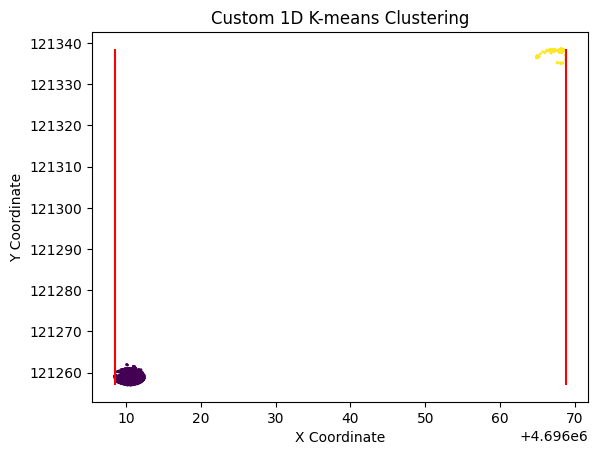

Second time 0.10282087326049805
Rotating vano
Cropping conductor
index -1 is out of bounds for axis 0 with size 0

Processing Vano 14

Reference G_13576762_13576801
First time 0.01960015296936035
Rotating vano
Cropping conductor
Umbral de corte superior detectado: 2873350.8379759043
Analyzing conductor configuration
Third time 0.4953005313873291
Number of lines: 6
Fourth time 0.002482175827026367
Starting fit
Prefit data shape (3, 7115)
Applying spectral clustering


/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 3.7672111988067627
clustering time 2 0.0019736289978027344
clustering time 3.7697701454162598
Fifth time 3.7750463485717773
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.4763167718253474, 0.6576882303710387
Fit Pearson R and Fit Spearman R for z coordinate: 0.8792737538308019, 0.8768450353890211
RmeanSE and RmaxSE error for z coordinate: 0.38747737262202087, 0.5335677108040262
Fit Pearson R and Fit Spearman R for z coordinate: 0.9218792152667492, 0.9104579894287624
RmeanSE and RmaxSE error for z coordinate: 0.9388976687587427, 1.2834378305819982
Fit Pearson R and Fit Spearman R for z coordinate: 0.3441969506188167, 0.3488930926232583
Sixth time 0.015700578689575195
Evaluating fit
Seventh time 0.004782915115356445
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13576762_13576801"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: -0.08%"},"Error polil\u00ednea":{"0":2873

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 2.7115824222564697
clustering time 2 0.0013120174407958984
clustering time 2.713559865951538
Fifth time 2.7172024250030518
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.4452579951308543, 0.6408749799967403
Fit Pearson R and Fit Spearman R for z coordinate: 0.8954023218290252, 0.8990011333474532
RmeanSE and RmaxSE error for z coordinate: 0.4625275959689068, 0.6068688070583961
Fit Pearson R and Fit Spearman R for z coordinate: 0.8866048859913082, 0.8919446691324122
RmeanSE and RmaxSE error for z coordinate: 0.1788115176735216, 0.37178750422302365
Fit Pearson R and Fit Spearman R for z coordinate: 0.9838833473269637, 0.9259740259740258
Sixth time 0.015178918838500977
Evaluating fit
Seventh time 0.005173683166503906
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13576736_13576740"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: -0.20%"},"Error polil\u00ednea":{"0":28680

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 0.446549654006958
clustering time 2 0.0016684532165527344
clustering time 0.450145959854126
Fifth time 0.45369768142700195
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.08185740669322183, 0.1890765341691817
Fit Pearson R and Fit Spearman R for z coordinate: 0.9966442209328141, 0.9909837549757866
RmeanSE and RmaxSE error for z coordinate: 0.038359156062879055, 0.132834482414396
Fit Pearson R and Fit Spearman R for z coordinate: 0.9992641312843429, 0.9984875604731462
RmeanSE and RmaxSE error for z coordinate: 0.6186847635278487, 1.2474599082787217
Fit Pearson R and Fit Spearman R for z coordinate: 0.7856500009060852, 0.7348164627363738
Sixth time 0.013869047164916992
Evaluating fit
Seventh time 0.004988670349121094
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13578445_13578497"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 0.54%"},"Error polil\u00ednea":{"0":41865

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 0.3689842224121094
clustering time 2 0.0010325908660888672
clustering time 0.3711667060852051
Fifth time 0.37432265281677246
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.03371938109461067, 0.09080705127969668
Fit Pearson R and Fit Spearman R for z coordinate: 0.9994313399822323, 0.9930162752431339
RmeanSE and RmaxSE error for z coordinate: 0.09063712348735528, 0.19023912341170024
Fit Pearson R and Fit Spearman R for z coordinate: 0.9958839853285733, 0.9952083862644329
RmeanSE and RmaxSE error for z coordinate: 0.332123256216629, 0.7671967245799693
Fit Pearson R and Fit Spearman R for z coordinate: 0.9432359952838202, 0.8995073891625613
Sixth time 0.015755653381347656
Evaluating fit
Seventh time 0.005354404449462891
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13578298_13578310"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: -0.13%"},"Error polil\u00ednea":{"0":4

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 0.8168611526489258
clustering time 2 0.0011625289916992188
clustering time 0.8189795017242432
Fifth time 0.8258705139160156
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.7685634075598908, 2.820237716816167
Fit Pearson R and Fit Spearman R for z coordinate: 0.6398319924649213, 0.6743716528457054
RmeanSE and RmaxSE error for z coordinate: 0.9260013610795553, 1.5617492799630057
Fit Pearson R and Fit Spearman R for z coordinate: 0.3775201711028776, 0.38181818181818183
RmeanSE and RmaxSE error for z coordinate: 0.45915456514607966, 1.623257074762196
Fit Pearson R and Fit Spearman R for z coordinate: 0.8884833216846484, 0.89072466376238
Sixth time 0.017430543899536133
Evaluating fit
Seventh time 0.0035958290100097656
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13578331_13578405"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 1.01%"},"Error polil\u00ednea":{"0":4692147

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 2.6076056957244873
clustering time 2 0.0012540817260742188
clustering time 2.609771490097046
Fifth time 2.617126226425171
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.574906595349553, 1.2146571947311804
Fit Pearson R and Fit Spearman R for z coordinate: 0.818223966853806, 0.7430653302080513
RmeanSE and RmaxSE error for z coordinate: 0.3174000809134198, 1.241789151362573
Fit Pearson R and Fit Spearman R for z coordinate: 0.9482917213192092, 0.9495909309516439
RmeanSE and RmaxSE error for z coordinate: 0.15926692524899774, 0.44025357865122905
Fit Pearson R and Fit Spearman R for z coordinate: 0.9872355577681724, 0.9848867090209746
Sixth time 0.015615224838256836
Evaluating fit
Seventh time 0.004784822463989258
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13578278_13578317"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 0.08%"},"Error polil\u00ednea":{"0":1042389.8

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 2.6904373168945312
clustering time 2 0.001889944076538086
clustering time 2.6929659843444824
Fifth time 2.69575834274292
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.3248587929689205, 2.229607361926386
Fit Pearson R and Fit Spearman R for z coordinate: 0.9457968522250418, 0.9089516997080153
RmeanSE and RmaxSE error for z coordinate: 0.4483785847371514, 0.9264762073722872
Fit Pearson R and Fit Spearman R for z coordinate: 0.8938437496529823, 0.8530769230769231
RmeanSE and RmaxSE error for z coordinate: 0.5112307702480989, 1.1285382930382029
Fit Pearson R and Fit Spearman R for z coordinate: 0.8594434825140191, 0.8644030145317873
Sixth time 0.017361164093017578
Evaluating fit
Seventh time 0.004175901412963867
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13578309_13578415"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 0.16%"},"Error polil\u00ednea":{"0":1049685.38

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 2.1222803592681885
clustering time 2 0.0015954971313476562
clustering time 2.124764919281006
Fifth time 2.127842903137207
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.11533595377595028, 0.38914645622108235
Fit Pearson R and Fit Spearman R for z coordinate: 0.9933265413583926, 0.9880269786692457
RmeanSE and RmaxSE error for z coordinate: 0.4389359227883287, 0.8167893996688935
Fit Pearson R and Fit Spearman R for z coordinate: 0.8986387529034214, 0.8629455385672995
RmeanSE and RmaxSE error for z coordinate: 0.3329954528627413, 0.7570605887165572
Fit Pearson R and Fit Spearman R for z coordinate: 0.9429284324731463, 0.9244993981836086
Sixth time 0.014622688293457031
Evaluating fit
Seventh time 0.0065538883209228516
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13578299_13578463"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 0.17%"},"Error polil\u00ednea":{"0":64953

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 0.7921454906463623
clustering time 2 0.0012924671173095703
clustering time 0.7941792011260986
Fifth time 0.7979059219360352
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.04125632792159986, 0.08811069012897765
Fit Pearson R and Fit Spearman R for z coordinate: 0.9991485959486619, 0.9986443114820018
RmeanSE and RmaxSE error for z coordinate: 0.019706123271585014, 0.08692543712053147
Fit Pearson R and Fit Spearman R for z coordinate: 0.9998058155038373, 0.9995412386228616
RmeanSE and RmaxSE error for z coordinate: 0.10522104397382588, 0.26882022643056214
Fit Pearson R and Fit Spearman R for z coordinate: 0.9944488583659705, 0.9978507055201906
Sixth time 0.01742267608642578
Evaluating fit
Seventh time 0.0042819976806640625
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13578374_13578463"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 12.34%"},"Error polil\u00ednea":{"0

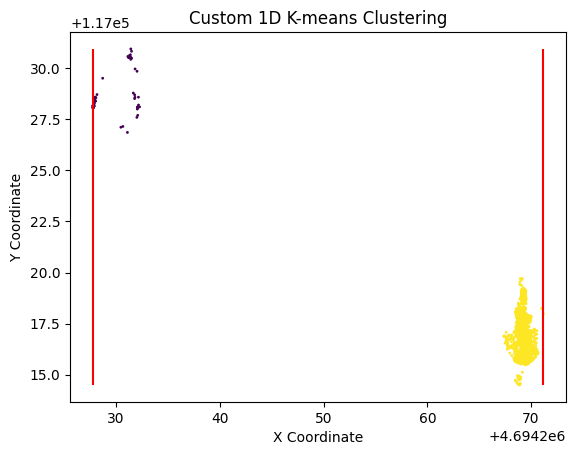

Second time 0.08034491539001465
Rotating vano
Cropping conductor
index -1 is out of bounds for axis 0 with size 0

Processing Vano 25

Reference G_13576890_13576891
First time 0.027545690536499023
Rotating vano
Cropping conductor
Umbral de corte superior detectado: -2797774.1438695285
Umbral de corte superior detectado: -2797632.206265988
Analyzing conductor configuration
Third time 0.6822364330291748
Number of lines: 6
Fourth time 0.002554655075073242
Starting fit
Prefit data shape (3, 10318)
Applying spectral clustering


/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 8.599417924880981
clustering time 2 0.0019216537475585938
clustering time 8.602195501327515
Fifth time 8.608220100402832
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.5091113275294368, 0.7046991896643608
Fit Pearson R and Fit Spearman R for z coordinate: 0.860700684658211, 0.7835021944343252
RmeanSE and RmaxSE error for z coordinate: 0.4887549889249695, 0.9161838943041951
Fit Pearson R and Fit Spearman R for z coordinate: 0.8724227577676518, 0.835656744556189
RmeanSE and RmaxSE error for z coordinate: 0.22218599084144638, 0.4343358251462133
Fit Pearson R and Fit Spearman R for z coordinate: 0.9750044204088473, 0.9591927047645324
Sixth time 0.020381689071655273
Evaluating fit
Seventh time 0.005638599395751953
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13576890_13576891"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: -0.06%"},"Error polil\u00ednea":{"0":2797703.5

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 26.440992832183838
clustering time 2 0.0013370513916015625
clustering time 26.443722248077393
Fifth time 26.448960304260254
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.18064135392610794, 0.43432844202190335
Fit Pearson R and Fit Spearman R for z coordinate: 0.9835650683743381, 0.9263196480938415
RmeanSE and RmaxSE error for z coordinate: 0.7588457038684534, 1.086898356716425
Fit Pearson R and Fit Spearman R for z coordinate: 0.6512883386077335, 0.5723657475047591
RmeanSE and RmaxSE error for z coordinate: 0.049212106226980405, 0.24546072458104984
Fit Pearson R and Fit Spearman R for z coordinate: 0.9987883502533751, 0.9979286143490591
Sixth time 0.01981186866760254
Evaluating fit
Seventh time 0.0057451725006103516
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13577128_13577129"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 0.17%"},"Error polil\u00ednea":{"0":28

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 0.39516258239746094
clustering time 2 0.0018887519836425781
clustering time 0.3977630138397217
Fifth time 0.40325450897216797
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.07909976101009852, 0.5882942192839052
Fit Pearson R and Fit Spearman R for z coordinate: 0.9968687780441341, 0.9700240340134736
RmeanSE and RmaxSE error for z coordinate: 0.9086538204309562, 2.785169595771435
Fit Pearson R and Fit Spearman R for z coordinate: 0.41755027939169387, 0.48260828275120404
RmeanSE and RmaxSE error for z coordinate: 0.047554936527400296, 0.13647413619805215
Fit Pearson R and Fit Spearman R for z coordinate: 0.9988686245608043, 0.9952899378341282
Sixth time 0.01514124870300293
Evaluating fit
Seventh time 0.0052263736724853516
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13578282_13578382"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 0.14%"},"Error polil\u00ednea":{"0"

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 0.8115999698638916
clustering time 2 0.001356363296508789
clustering time 0.8141882419586182
Fifth time 0.818854570388794
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.6937236066878877, 2.0039744363774643
Fit Pearson R and Fit Spearman R for z coordinate: 0.7202413190261394, 0.6658761528326744
RmeanSE and RmaxSE error for z coordinate: 0.05505054773137881, 0.16947148558763292
Fit Pearson R and Fit Spearman R for z coordinate: 0.9984861887559089, 0.9872682713985412
RmeanSE and RmaxSE error for z coordinate: 0.07117482836140096, 0.20568842455330982
Fit Pearson R and Fit Spearman R for z coordinate: 0.9974643060981908, 0.9873266174813031
Sixth time 0.020041465759277344
Evaluating fit
Seventh time 0.0057828426361083984
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13578407_13578444"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 3.27%"},"Error polil\u00ednea":{"0":711

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 1.881033182144165
clustering time 2 0.0021369457244873047
clustering time 1.884199857711792
Fifth time 1.8892710208892822
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.16628397004786716, 0.5325038017857904
Fit Pearson R and Fit Spearman R for z coordinate: 0.9862039119404653, 0.9817370074594325
RmeanSE and RmaxSE error for z coordinate: 0.23601748147527826, 0.8320173177057857
Fit Pearson R and Fit Spearman R for z coordinate: 0.9717488093374489, 0.9702402106704613
RmeanSE and RmaxSE error for z coordinate: 0.027835989195359897, 0.09747718533920224
Fit Pearson R and Fit Spearman R for z coordinate: 0.9996125107355602, 0.9981137310315696
Sixth time 0.019345521926879883
Evaluating fit
Seventh time 0.004655122756958008
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13578394_13578435"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 0.04%"},"Error polil\u00ednea":{"0":713

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 2.765608310699463
clustering time 2 0.0012202262878417969
clustering time 2.7674388885498047
Fifth time 2.7717397212982178
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.23819141793785784, 0.5754186133326821
Fit Pearson R and Fit Spearman R for z coordinate: 0.9712993422714151, 0.9483969049718104
RmeanSE and RmaxSE error for z coordinate: 0.6551601614533146, 1.8653697533773674
Fit Pearson R and Fit Spearman R for z coordinate: 0.7554900150534993, 0.7350877192982455
RmeanSE and RmaxSE error for z coordinate: 0.17651253125327723, 0.4614015103870067
Fit Pearson R and Fit Spearman R for z coordinate: 0.9842983929354399, 0.9266345797852645
Sixth time 0.014188766479492188
Evaluating fit
Seventh time 0.0051267147064208984
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13578301_13578439"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 1.19%"},"Error polil\u00ednea":{"0":7064

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 3.529846668243408
clustering time 2 0.0039000511169433594
clustering time 3.534349203109741
Fifth time 3.539452075958252
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.12382325025511597, 0.3148333496015616
Fit Pearson R and Fit Spearman R for z coordinate: 0.9923804466983113, 0.9962429821003352
RmeanSE and RmaxSE error for z coordinate: 0.13935639714525846, 1.2286100161776952
Fit Pearson R and Fit Spearman R for z coordinate: 0.9902795516912034, 0.9933553403205148
RmeanSE and RmaxSE error for z coordinate: 0.052183693639810895, 0.27445954582610166
Fit Pearson R and Fit Spearman R for z coordinate: 0.9986375028686816, 0.9981758361303877
Sixth time 0.028051376342773438
Evaluating fit
Seventh time 0.01259303092956543
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13578311_13578407"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 32.11%"},"Error polil\u00ednea":{"0":7041

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


RmeanSE and RmaxSE error for z coordinate: 0.6575562158569371, 0.8952444551998922
Fit Pearson R and Fit Spearman R for z coordinate: 0.7534054924247738, 0.7421512167937566
RmeanSE and RmaxSE error for z coordinate: 0.26412695427412863, 0.36192446239403925
Fit Pearson R and Fit Spearman R for z coordinate: 0.9644879221773015, 0.915569331014402
RmeanSE and RmaxSE error for z coordinate: 0.17456548975771366, 0.30192026437242236
Fit Pearson R and Fit Spearman R for z coordinate: 0.984645565575969, 0.9728375521983895
Sixth time 0.016816139221191406
Evaluating fit
Seventh time 0.006300449371337891
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13578376_13578412"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: -0.65%"},"Error polil\u00ednea":{"0":101383.333223941},"Error nuestro ajuste":{"0":1.3398107715}}
Eigth time 0.0064313411712646484

Processing Vano 33

Reference G_13576740_13576792
First time 0.0291562080383

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 2.2666714191436768
clustering time 2 0.0021064281463623047
clustering time 2.270369052886963
Fifth time 2.273759365081787
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.09479885347178177, 0.21288100703546897
Fit Pearson R and Fit Spearman R for z coordinate: 0.995496448935304, 0.995112931059326
RmeanSE and RmaxSE error for z coordinate: 0.034230594224202424, 0.09616503123299558
Fit Pearson R and Fit Spearman R for z coordinate: 0.9994140478558347, 0.9971030634208367
RmeanSE and RmaxSE error for z coordinate: 0.976923681433303, 2.224825501744242
Fit Pearson R and Fit Spearman R for z coordinate: 0.2135893343843414, 0.23234684426488467
Sixth time 0.016190528869628906
Evaluating fit
Seventh time 0.006000518798828125
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13578445_13578523"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 0.15%"},"Error polil\u00ednea":{"0":469323

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 0.3585927486419678
clustering time 2 0.0007472038269042969
clustering time 0.3600337505340576
Fifth time 0.3635139465332031
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.45949123363386, 0.6779625750088321
Fit Pearson R and Fit Spearman R for z coordinate: 0.8881823070647465, 0.881242963955057
RmeanSE and RmaxSE error for z coordinate: 0.8341718346971373, 2.327880390023407
Fit Pearson R and Fit Spearman R for z coordinate: 0.551504624203856, 0.5649018276093863
RmeanSE and RmaxSE error for z coordinate: 0.06466398209170662, 0.2178115970539828
Fit Pearson R and Fit Spearman R for z coordinate: 0.9979070946518684, 0.99509024635953
Sixth time 0.01485753059387207
Evaluating fit
Seventh time 0.003957509994506836
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13578457_13578461"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 0.52%"},"Error polil\u00ednea":{"0":4469856.44045

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 0.4223034381866455
clustering time 2 0.0014176368713378906
clustering time 0.42429018020629883
Fifth time 0.4273502826690674
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.40410926872751773, 0.8850618953822711
Fit Pearson R and Fit Spearman R for z coordinate: 0.9147115817975333, 0.8519933493940067
RmeanSE and RmaxSE error for z coordinate: 0.10174302214084484, 0.3708768091455207
Fit Pearson R and Fit Spearman R for z coordinate: 0.9948107143812555, 0.992241489656112
RmeanSE and RmaxSE error for z coordinate: 0.5330324066019437, 0.9884303323761012
Fit Pearson R and Fit Spearman R for z coordinate: 0.8460950580689431, 0.7688338493292053
Sixth time 0.025722503662109375
Evaluating fit
Seventh time 0.0060825347900390625
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13578350_13578460"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 0.59%"},"Error polil\u00ednea":{"0":447

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 0.7103016376495361
clustering time 2 0.0015468597412109375
clustering time 0.7128732204437256
Fifth time 0.7155108451843262
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.6017850289704896, 0.9114658599994002
Fit Pearson R and Fit Spearman R for z coordinate: 0.7986584114264598, 0.58208043824175
RmeanSE and RmaxSE error for z coordinate: 0.6217875335475951, 1.0630420626000814
Fit Pearson R and Fit Spearman R for z coordinate: 0.7831859696936995, 0.8019327070993855
RmeanSE and RmaxSE error for z coordinate: 0.08190309607992037, 0.33666765635940077
Fit Pearson R and Fit Spearman R for z coordinate: 0.9966402976315064, 0.993775979516682
Sixth time 0.026288986206054688
Evaluating fit
Seventh time 0.0058536529541015625
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13578336_13578432"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 0.53%"},"Error polil\u00ednea":{"0":456135

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 0.7390398979187012
clustering time 2 0.0014522075653076172
clustering time 0.7414178848266602
Fifth time 0.744697093963623
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.9172416619209426, 1.4948973550453135
Fit Pearson R and Fit Spearman R for z coordinate: 0.39833714580949386, 0.3874472776209078
RmeanSE and RmaxSE error for z coordinate: 0.9963796584610778, 2.0917125531830822
Fit Pearson R and Fit Spearman R for z coordinate: 0.08501748895882269, 0.023167944982060377
RmeanSE and RmaxSE error for z coordinate: 0.5513053695197215, 1.4096914955218516
Fit Pearson R and Fit Spearman R for z coordinate: 0.8343035357365344, 0.8368983957219251
Sixth time 0.0204160213470459
Evaluating fit
Seventh time 0.006792306900024414
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13578391_13578409"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 0.46%"},"Error polil\u00ednea":{"0":45744

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 6.487707853317261
clustering time 2 0.0009818077087402344
clustering time 6.489454507827759
Fifth time 6.4933812618255615
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.21182255539674277, 0.4221118918269653
Fit Pearson R and Fit Spearman R for z coordinate: 0.9773424365003548, 0.8837311243497785
RmeanSE and RmaxSE error for z coordinate: 0.0311129164308544, 0.08266207481475518
Fit Pearson R and Fit Spearman R for z coordinate: 0.9995160217847742, 0.9943012842196729
RmeanSE and RmaxSE error for z coordinate: 0.14204871638024483, 0.5109055289782325
Fit Pearson R and Fit Spearman R for z coordinate: 0.9900013286239442, 0.9860115094577027
Sixth time 0.015866518020629883
Evaluating fit
Seventh time 0.0054416656494140625
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13578317_13578332"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 0.11%"},"Error polil\u00ednea":{"0":1043

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 0.4398946762084961
clustering time 2 0.0018720626831054688
clustering time 0.4424777030944824
Fifth time 0.44520998001098633
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.21311857461948377, 1.749207323156935
Fit Pearson R and Fit Spearman R for z coordinate: 0.9770266385312392, 0.8578870133868697
RmeanSE and RmaxSE error for z coordinate: 0.2010756268713274, 1.7653411296800032
Fit Pearson R and Fit Spearman R for z coordinate: 0.9795757243301372, 0.9784621664463934
RmeanSE and RmaxSE error for z coordinate: 0.975601482218295, 1.6297791955067205
Fit Pearson R and Fit Spearman R for z coordinate: 0.21954896662290438, 0.22857142857142856
Sixth time 0.015427350997924805
Evaluating fit
Seventh time 0.004773855209350586
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13578374_13578375"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 0.42%"},"Error polil\u00ednea":{"0":4630

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 4.234612464904785
clustering time 2 0.0015039443969726562
clustering time 4.236898183822632
Fifth time 4.241801977157593
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.8853569830407407, 1.212353551021875
Fit Pearson R and Fit Spearman R for z coordinate: 0.4649119640879621, 0.4494541928484586
RmeanSE and RmaxSE error for z coordinate: 0.9902012168804236, 1.2589906762389111
Fit Pearson R and Fit Spearman R for z coordinate: 0.13965188452027893, 0.372569693942037
RmeanSE and RmaxSE error for z coordinate: 0.9431164488498397, 4.775797788228135
Fit Pearson R and Fit Spearman R for z coordinate: 0.33246258208107854, 0.696546944455143
Sixth time 0.01673579216003418
Evaluating fit
Seventh time 0.005109071731567383
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13577129_13577130"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 0.26%"},"Error polil\u00ednea":{"0":2799144.1908

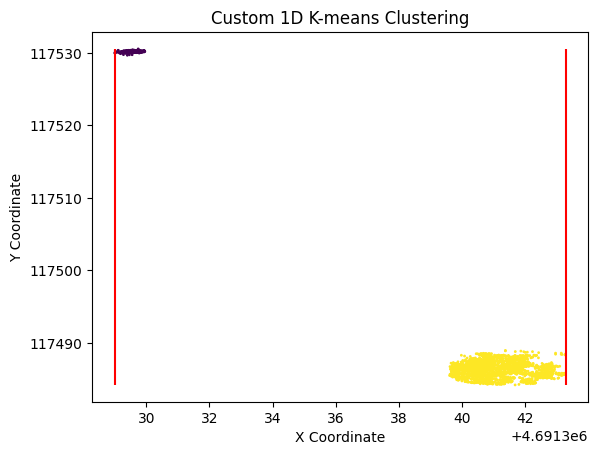

Second time 0.08109593391418457
Rotating vano
Cropping conductor
index -1 is out of bounds for axis 0 with size 0

Processing Vano 46

Reference G_13578334_13578477
First time 0.007200002670288086
Rotating vano
Cropping conductor
Umbral de corte superior detectado: -4587482.569864671
Umbral de corte superior detectado: -4587440.84827443
Analyzing conductor configuration
Third time 0.06073570251464844
Number of lines: 0
Setting vano score
Vano score {"Vano":{"0":"G_13578334_13578477"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 50.00%"},"Error polil\u00ednea":{"0":0},"Error nuestro ajuste":{"0":0.0}}
Eigth time 0.2135300636291504

Processing Vano 47

Reference G_13578302_13578473
First time 0.010414600372314453
Rotating vano
Cropping conductor
Umbral de corte superior detectado: -4516741.6579661295
Analyzing conductor configuration
Third time 0.09657573699951172
Number of lines: 3
Fourth time 0.0013856887817382812
Starting fit

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 0.5567946434020996
clustering time 2 0.0015625953674316406
clustering time 0.5595760345458984
Fifth time 0.5629737377166748
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.26973216106443704, 0.7601859940954877
Fit Pearson R and Fit Spearman R for z coordinate: 0.9629387651694137, 0.9795797230296922
RmeanSE and RmaxSE error for z coordinate: 0.4353828028542772, 0.9455976428964343
Fit Pearson R and Fit Spearman R for z coordinate: 0.9005799560750934, 0.8495239919630596
RmeanSE and RmaxSE error for z coordinate: 0.1645387180550229, 0.5866347680591241
Fit Pearson R and Fit Spearman R for z coordinate: 0.9863706392885839, 0.9449601312053884
Sixth time 0.01859140396118164
Evaluating fit
Seventh time 0.0050945281982421875
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13578302_13578473"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 0.22%"},"Error polil\u00ednea":{"0":45166

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 2.123422145843506
clustering time 2 0.0013344287872314453
clustering time 2.1255910396575928
Fifth time 2.129396677017212
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.14600019344535825, 0.28823807459655115
Fit Pearson R and Fit Spearman R for z coordinate: 0.9892926931616803, 0.9242129244120592
RmeanSE and RmaxSE error for z coordinate: 0.11402854035365326, 0.4264197861096628
Fit Pearson R and Fit Spearman R for z coordinate: 0.9934821115065616, 0.9525831168064701
RmeanSE and RmaxSE error for z coordinate: 0.04037891712487229, 0.1234724211485363
Fit Pearson R and Fit Spearman R for z coordinate: 0.999184438961963, 0.9979116837879489
Sixth time 0.013781070709228516
Evaluating fit
Seventh time 0.005922555923461914
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13578301_13578500"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 0.08%"},"Error polil\u00ednea":{"0":70124

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 2.325554847717285
clustering time 2 0.002672910690307617
clustering time 2.3298895359039307
Fifth time 2.3327183723449707
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.7055160797260258, 1.189758907594209
Fit Pearson R and Fit Spearman R for z coordinate: 0.7086940484606955, 0.665279643598249
RmeanSE and RmaxSE error for z coordinate: 0.9990175287819997, 1.9480314400344931
Fit Pearson R and Fit Spearman R for z coordinate: 0.044316787157286514, 0.16287067802530059
RmeanSE and RmaxSE error for z coordinate: 0.529181949344995, 1.329888053819845
Fit Pearson R and Fit Spearman R for z coordinate: 0.8485083763885696, 0.8315789473684211
Sixth time 0.016303300857543945
Evaluating fit
Seventh time 0.003759622573852539
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13576829_13576866"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 16.02%"},"Error polil\u00ednea":{"0":1482988.

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 8.853315591812134
clustering time 2 0.0016601085662841797
clustering time 8.855871677398682
Fifth time 8.86135482788086
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.3466475570973408, 0.6531539686461875
Fit Pearson R and Fit Spearman R for z coordinate: 0.9379962206080111, 0.8865080563514685
RmeanSE and RmaxSE error for z coordinate: 0.38858013593033114, 0.6477715769893837
Fit Pearson R and Fit Spearman R for z coordinate: 0.9214151766321379, 0.8397353877507678
RmeanSE and RmaxSE error for z coordinate: 0.5949560313194792, 1.9734599218095688
Fit Pearson R and Fit Spearman R for z coordinate: 0.8037582478970028, 0.981424148606811
Sixth time 0.019505023956298828
Evaluating fit
Seventh time 0.006033658981323242
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13576786_13576866"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: -0.01%"},"Error polil\u00ednea":{"0":2833178.2

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 2.8232693672180176
clustering time 2 0.0014965534210205078
clustering time 2.8256707191467285
Fifth time 2.8289804458618164
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.9107982472859183, 1.249355475494565
Fit Pearson R and Fit Spearman R for z coordinate: 0.4128517954182685, 0.39090511149451457
RmeanSE and RmaxSE error for z coordinate: 0.5290587212663989, 0.720650855267359
Fit Pearson R and Fit Spearman R for z coordinate: 0.8485852211121392, 0.8496916975083342
RmeanSE and RmaxSE error for z coordinate: 0.8813436679124874, 1.4467956121091707
Fit Pearson R and Fit Spearman R for z coordinate: 0.47247577648866684, 0.5
Sixth time 0.014826297760009766
Evaluating fit
Seventh time 0.005721569061279297
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13576786_13576844"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 0.13%"},"Error polil\u00ednea":{"0":2868550.0471394458},"

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 1.9979009628295898
clustering time 2 0.002226114273071289
clustering time 2.0011303424835205
Fifth time 2.00534725189209
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.7508207849792256, 1.145611601083571
Fit Pearson R and Fit Spearman R for z coordinate: 0.660506052408677, 0.6165924703495805
RmeanSE and RmaxSE error for z coordinate: 0.8143397779834289, 1.22904812602741
Fit Pearson R and Fit Spearman R for z coordinate: 0.580388426943812, 0.5631721063179945
RmeanSE and RmaxSE error for z coordinate: 0.9763124533035431, 1.2955516123585753
Fit Pearson R and Fit Spearman R for z coordinate: 0.21636541747685528, 0.334261115793301
Sixth time 0.013437986373901367
Evaluating fit
Seventh time 0.0064525604248046875
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13576858_13576873"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 0.20%"},"Error polil\u00ednea":{"0":2879976.72984

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 3.289912700653076
clustering time 2 0.0011069774627685547
clustering time 3.29181170463562
Fifth time 3.2962772846221924
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.1106259683243589, 0.2765158063046196
Fit Pearson R and Fit Spearman R for z coordinate: 0.9938685611057272, 0.9826145185431681
RmeanSE and RmaxSE error for z coordinate: 0.8860325358497434, 2.2685406823098004
Fit Pearson R and Fit Spearman R for z coordinate: 0.46362306417730464, 0.4214774247622524
RmeanSE and RmaxSE error for z coordinate: 0.9844335378931729, 2.433790344646006
Fit Pearson R and Fit Spearman R for z coordinate: 0.1757572467429438, 0.27472527472527475
Sixth time 0.01606011390686035
Evaluating fit
Seventh time 0.005681037902832031
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13578523_13578527"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 0.08%"},"Error polil\u00ednea":{"0":4693098.5

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 0.37838172912597656
clustering time 2 0.0010063648223876953
clustering time 0.3802220821380615
Fifth time 0.38335680961608887
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.886826239148004, 1.5368574017827268
Fit Pearson R and Fit Spearman R for z coordinate: 0.4621320711469363, 0.3772729545342114
RmeanSE and RmaxSE error for z coordinate: 0.9335534316239417, 1.3899766385678824
Fit Pearson R and Fit Spearman R for z coordinate: 0.3584399525252666, 0.4364659768248962
RmeanSE and RmaxSE error for z coordinate: 0.7135260664053368, 1.5490182464298865
Fit Pearson R and Fit Spearman R for z coordinate: 0.7006286837991837, 0.8316750210882434
Sixth time 0.01723003387451172
Evaluating fit
Seventh time 0.004968881607055664
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13578320_13578341"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 7.56%"},"Error polil\u00ednea":{"0":469190

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 0.39256882667541504
clustering time 2 0.0009465217590332031
clustering time 0.3942830562591553
Fifth time 0.397463321685791
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.912998556068753, 2.4172020280597173
Fit Pearson R and Fit Spearman R for z coordinate: 0.4079628021179849, 0.3611114294660205
RmeanSE and RmaxSE error for z coordinate: 0.9506449489939759, 1.9967264520243138
Fit Pearson R and Fit Spearman R for z coordinate: 0.31028081030327803, 0.25490196078431376
RmeanSE and RmaxSE error for z coordinate: 0.835288071076733, 1.540496871168851
Fit Pearson R and Fit Spearman R for z coordinate: 0.5502174849063557, 0.29090909090909095
Sixth time 0.014848470687866211
Evaluating fit
Seventh time 0.004506587982177734
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13578387_13578433"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 0.48%"},"Error polil\u00ednea":{"0":456160

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 0.935338020324707
clustering time 2 0.0016787052154541016
clustering time 0.9380359649658203
Fifth time 0.9431948661804199
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.2564167966834564, 1.8403725033253988
Fit Pearson R and Fit Spearman R for z coordinate: 0.9665663639375246, 0.8311725245328593
RmeanSE and RmaxSE error for z coordinate: 0.9916605623549852, 2.7240812578610485
Fit Pearson R and Fit Spearman R for z coordinate: 0.12887719065214784, 0.01922594834815443
RmeanSE and RmaxSE error for z coordinate: 0.11669140323668366, 0.559165761257505
Fit Pearson R and Fit Spearman R for z coordinate: 0.9931686122532339, 0.9295394750759154
Sixth time 0.012886285781860352
Evaluating fit
Seventh time 0.005120992660522461
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13578309_13578348"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 0.07%"},"Error polil\u00ednea":{"0":10450

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 1.3170113563537598
clustering time 2 0.0012545585632324219
clustering time 1.320277452468872
Fifth time 1.3247771263122559
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.34415987518206725, 0.5379401151219001
Fit Pearson R and Fit Spearman R for z coordinate: 0.9389110645752998, 0.9384518018901288
RmeanSE and RmaxSE error for z coordinate: 0.865342722706229, 1.2172364480761892
Fit Pearson R and Fit Spearman R for z coordinate: 0.501180582940095, 0.45118014981760046
RmeanSE and RmaxSE error for z coordinate: 0.05273849718756741, 0.17241107085137608
Fit Pearson R and Fit Spearman R for z coordinate: 0.998608479737501, 0.9983416546147259
Sixth time 0.017951011657714844
Evaluating fit
Seventh time 0.0051462650299072266
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13578279_13578295"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 0.71%"},"Error polil\u00ednea":{"0":44698

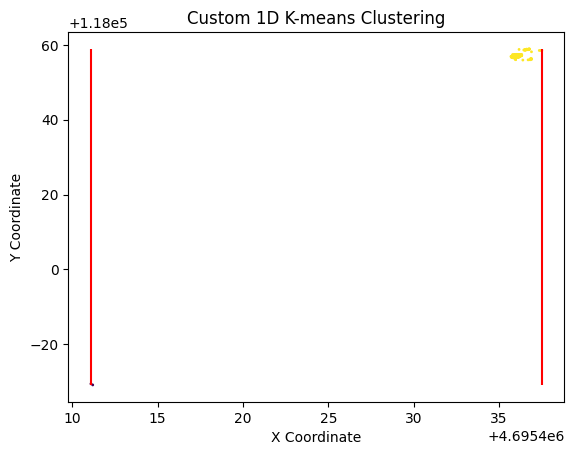

Second time 0.08507061004638672
Rotating vano
Cropping conductor
index -1 is out of bounds for axis 0 with size 0

Processing Vano 59

Reference G_13528004_13528458
First time 0.015365839004516602
Rotating vano
Cropping conductor
Umbral de corte superior detectado: -26671.398115403914
Umbral de corte superior detectado: -26605.586524593695
Analyzing conductor configuration
Third time 0.2735915184020996
Number of lines: 6
Fourth time 0.002576112747192383
Starting fit
Prefit data shape (3, 4333)
Applying spectral clustering


/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 4.754872798919678
clustering time 2 0.0014886856079101562
clustering time 4.758381366729736
Fifth time 4.7638185024261475
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.8929508699054512, 1.3018054656059574
Fit Pearson R and Fit Spearman R for z coordinate: 0.45015426284298243, 0.408661085623511
RmeanSE and RmaxSE error for z coordinate: 0.7813857214624824, 1.8414316549491896
Fit Pearson R and Fit Spearman R for z coordinate: 0.6240483589548169, 0.6288536691272253
RmeanSE and RmaxSE error for z coordinate: 0.9778297113552579, 1.8231974868608563
Fit Pearson R and Fit Spearman R for z coordinate: 0.20940178290932915, 0.20504729442323275
Sixth time 0.01680898666381836
Evaluating fit
Seventh time 0.004055500030517578
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13528004_13528458"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 0.29%"},"Error polil\u00ednea":{"0":26646.4

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 1.443897008895874
clustering time 2 0.0019299983978271484
clustering time 1.4471938610076904
Fifth time 1.4536006450653076
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.009605579926056212, 0.03916765790475263
Fit Pearson R and Fit Spearman R for z coordinate: 0.9999538657712059, 0.999907929123647
RmeanSE and RmaxSE error for z coordinate: 0.059850694210835456, 0.22631407832817474
Fit Pearson R and Fit Spearman R for z coordinate: 0.9982073420538967, 0.9989629180904885
RmeanSE and RmaxSE error for z coordinate: 0.03360829910451514, 0.1172197080783246
Fit Pearson R and Fit Spearman R for z coordinate: 0.9994350815496454, 0.9988562178756268
Sixth time 0.015103340148925781
Evaluating fit
Seventh time 0.006451606750488281
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13578299_13578417"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: -0.43%"},"Error polil\u00ednea":{"0":

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 0.4067087173461914
clustering time 2 0.001356363296508789
clustering time 0.4089677333831787
Fifth time 0.4122889041900635
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.8063362746599669, 1.0266415401945097
Fit Pearson R and Fit Spearman R for z coordinate: 0.5914573629576744, 0.5341683894807001
RmeanSE and RmaxSE error for z coordinate: 0.729840996363635, 1.206457952413364
Fit Pearson R and Fit Spearman R for z coordinate: 0.6836169395731929, 0.6387318152870233
RmeanSE and RmaxSE error for z coordinate: 0.1649421243064867, 0.35909030318435775
Fit Pearson R and Fit Spearman R for z coordinate: 0.9863032472973678, 0.9710160660008683
Sixth time 0.013970375061035156
Evaluating fit
Seventh time 0.005444765090942383
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13563638_13578462"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 0.53%"},"Error polil\u00ednea":{"0":4591005.

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 3.370272636413574
clustering time 2 0.0016009807586669922
clustering time 3.3733668327331543
Fifth time 3.378664255142212
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.8542538341624418, 2.571807105325782
Fit Pearson R and Fit Spearman R for z coordinate: 0.5198561866437499, 0.47533724598470306
RmeanSE and RmaxSE error for z coordinate: 0.1856128795044801, 0.8370084728998953
Fit Pearson R and Fit Spearman R for z coordinate: 0.9826231340383127, 0.9572892259288851
RmeanSE and RmaxSE error for z coordinate: 0.5324408424323048, 1.2771784531716865
Fit Pearson R and Fit Spearman R for z coordinate: 0.846467886019443, 0.8585837550338982
Sixth time 0.016576051712036133
Evaluating fit
Seventh time 0.004357576370239258
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13576774_13577127"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 0.43%"},"Error polil\u00ednea":{"0":2801803.7

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 1.8015997409820557
clustering time 2 0.0017237663269042969
clustering time 1.8041975498199463
Fifth time 1.8097610473632812
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.003967794155157553, 0.012036329876319973
Fit Pearson R and Fit Spearman R for z coordinate: 0.999992128274364, 0.9992883367774611
RmeanSE and RmaxSE error for z coordinate: 0.024233999781104895, 0.06683601080313561
Fit Pearson R and Fit Spearman R for z coordinate: 0.9997063147011788, 0.9995322209865095
RmeanSE and RmaxSE error for z coordinate: 0.02271480253352514, 0.05813423708211063
Fit Pearson R and Fit Spearman R for z coordinate: 0.9997419855937997, 0.998268770130462
Sixth time 0.017579317092895508
Evaluating fit
Seventh time 0.004010200500488281
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13578384_13578451"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: -0.06%"},"Error polil\u00ednea":{"0

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 1.871992588043213
clustering time 2 0.001968860626220703
clustering time 1.8744895458221436
Fifth time 1.8786664009094238
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.12068281935955553, 0.3374115243234397
Fit Pearson R and Fit Spearman R for z coordinate: 0.9927592945689263, 0.9977689532559774
RmeanSE and RmaxSE error for z coordinate: 0.06894727069912632, 0.2671389101902083
Fit Pearson R and Fit Spearman R for z coordinate: 0.9976203054764168, 0.9956376839447912
RmeanSE and RmaxSE error for z coordinate: 0.3158121166612554, 0.5593611337549111
Fit Pearson R and Fit Spearman R for z coordinate: 0.9488966601681431, 0.8548591368443208
Sixth time 0.018213272094726562
Evaluating fit
Seventh time 0.004876136779785156
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13578403_13578500"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 0.05%"},"Error polil\u00ednea":{"0":708220

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 3.4880943298339844
clustering time 2 0.002493143081665039
clustering time 3.491790533065796
Fifth time 3.4975900650024414
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.42472957084224855, 0.6051525806675633
Fit Pearson R and Fit Spearman R for z coordinate: 0.9053202762733821, 0.8550528724743739
RmeanSE and RmaxSE error for z coordinate: 0.558692993846392, 0.8644332921899476
Fit Pearson R and Fit Spearman R for z coordinate: 0.8293745467736056, 0.8326288635297906
RmeanSE and RmaxSE error for z coordinate: 0.9662480531401242, 2.6278213152666203
Fit Pearson R and Fit Spearman R for z coordinate: 0.2576134716525514, 0.2925098157656297
Sixth time 0.017900466918945312
Evaluating fit
Seventh time 0.006135463714599609
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13576780_13576884"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: -0.01%"},"Error polil\u00ednea":{"0":2869005

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 2.6366422176361084
clustering time 2 0.0009500980377197266
clustering time 2.638131856918335
Fifth time 2.64106822013855
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.8978741900527926, 1.2186424133977394
Fit Pearson R and Fit Spearman R for z coordinate: 0.44025398543816596, 0.44964361583307993
RmeanSE and RmaxSE error for z coordinate: 0.99276861774378, 1.3748157557469556
Fit Pearson R and Fit Spearman R for z coordinate: 0.12004376833422592, 0.27479094273815635
RmeanSE and RmaxSE error for z coordinate: 0.8481582845444706, 1.403321351354707
Fit Pearson R and Fit Spearman R for z coordinate: 0.529742955387401, 0.5566106496593795
Sixth time 0.01658773422241211
Evaluating fit
Seventh time 0.004452228546142578
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13576736_13576851"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 0.04%"},"Error polil\u00ednea":{"0":2859146.47

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 0.5142476558685303
clustering time 2 0.0014808177947998047
clustering time 0.5165622234344482
Fifth time 0.5196874141693115
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.23039709657062496, 0.8257314225756228
Fit Pearson R and Fit Spearman R for z coordinate: 0.9730967035342901, 0.9643928990552549
RmeanSE and RmaxSE error for z coordinate: 0.9022211558895671, 2.1808201389359008
Fit Pearson R and Fit Spearman R for z coordinate: 0.43141155637812706, 0.40938630889710587
RmeanSE and RmaxSE error for z coordinate: 0.9611680604741274, 2.3362497541007845
Fit Pearson R and Fit Spearman R for z coordinate: 0.2760052216474034, 0.25074130246885756
Sixth time 0.01517939567565918
Evaluating fit
Seventh time 0.004886150360107422
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13578396_13578483"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 1.12%"},"Error polil\u00ednea":{"0":469

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 0.7205703258514404
clustering time 2 0.0013799667358398438
clustering time 0.7227993011474609
Fifth time 0.7266881465911865
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.7739700863490856, 1.005209934129422
Fit Pearson R and Fit Spearman R for z coordinate: 0.6332325710319056, 0.6080373609969827
RmeanSE and RmaxSE error for z coordinate: 0.061316923699403336, 0.2075859571445653
Fit Pearson R and Fit Spearman R for z coordinate: 0.9981183491782087, 0.9959860897720534
RmeanSE and RmaxSE error for z coordinate: 0.29351657375715134, 0.9523281061332889
Fit Pearson R and Fit Spearman R for z coordinate: 0.955958696519161, 0.7776590092769089
Sixth time 0.014799356460571289
Evaluating fit
Seventh time 0.0044133663177490234
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13578452_13578480"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 1.16%"},"Error polil\u00ednea":{"0":4470

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 1.9855167865753174
clustering time 2 0.0008993148803710938
clustering time 1.9869449138641357
Fifth time 1.9895620346069336
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.12658102908891988, 0.5048027682062981
Fit Pearson R and Fit Spearman R for z coordinate: 0.9919623049058888, 0.9812176040644923
RmeanSE and RmaxSE error for z coordinate: 0.40228424446478156, 0.7713771983887026
Fit Pearson R and Fit Spearman R for z coordinate: 0.9155909506772966, 0.9173334910495551
RmeanSE and RmaxSE error for z coordinate: 0.8340768197698399, 1.8638745024918069
Fit Pearson R and Fit Spearman R for z coordinate: 0.5516483107233114, 0.5207746332096957
Sixth time 0.01566600799560547
Evaluating fit
Seventh time 0.0056915283203125
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13578337_13578377"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 0.33%"},"Error polil\u00ednea":{"0":4577119

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 4.018919467926025
clustering time 2 0.0014944076538085938
clustering time 4.021336555480957
Fifth time 4.027201414108276
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.6544247302400316, 1.0222266477749182
Fit Pearson R and Fit Spearman R for z coordinate: 0.7561507092721542, 0.7195242339965039
RmeanSE and RmaxSE error for z coordinate: 0.5357238329237448, 1.387051415987613
Fit Pearson R and Fit Spearman R for z coordinate: 0.844529714282791, 0.804796793196093
RmeanSE and RmaxSE error for z coordinate: 0.806610764400251, 1.9538232922985328
Fit Pearson R and Fit Spearman R for z coordinate: 0.5910829683409193, 0.6545454545454547
Sixth time 0.016039133071899414
Evaluating fit
Seventh time 0.004788875579833984
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13578393_13578412"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 0.03%"},"Error polil\u00ednea":{"0":118864.023032

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 2.823298931121826
clustering time 2 0.0011594295501708984
clustering time 2.825021266937256
Fifth time 2.8295278549194336
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.07732527164644305, 0.2352562547360919
Fit Pearson R and Fit Spearman R for z coordinate: 0.997022866892455, 0.9994032556907801
RmeanSE and RmaxSE error for z coordinate: 0.13138103284615363, 0.43107518887249563
Fit Pearson R and Fit Spearman R for z coordinate: 0.9913319727308809, 0.9880964050105253
RmeanSE and RmaxSE error for z coordinate: 0.125352191614431, 0.48045929639716123
Fit Pearson R and Fit Spearman R for z coordinate: 0.992204156254584, 0.9833589797401372
Sixth time 0.014777183532714844
Evaluating fit
Seventh time 0.0052988529205322266
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13578372_13578476"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 0.12%"},"Error polil\u00ednea":{"0":701828

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 3.7238409519195557
clustering time 2 0.0020258426666259766
clustering time 3.7269809246063232
Fifth time 3.731764078140259
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.5888080991372691, 0.9810955631224467
Fit Pearson R and Fit Spearman R for z coordinate: 0.8083565761607314, 0.7914910090270225
RmeanSE and RmaxSE error for z coordinate: 0.22621674482024906, 1.002068688443991
Fit Pearson R and Fit Spearman R for z coordinate: 0.9740769910143403, 0.951379486280955
RmeanSE and RmaxSE error for z coordinate: 0.16142228297472366, 0.6005970217009543
Fit Pearson R and Fit Spearman R for z coordinate: 0.9868854272708647, 0.9839271995855604
Sixth time 0.015465736389160156
Evaluating fit
Seventh time 0.005615711212158203
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13578388_13578466"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 0.54%"},"Error polil\u00ednea":{"0":4587585

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 20.03374457359314
clustering time 2 0.0018410682678222656
clustering time 20.036676168441772
Fifth time 20.04105043411255
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.8781504139478057, 1.258127071976237
Fit Pearson R and Fit Spearman R for z coordinate: 0.4783886506953858, 0.4605521434901783
RmeanSE and RmaxSE error for z coordinate: 0.6013750035918916, 1.6456329047607867
Fit Pearson R and Fit Spearman R for z coordinate: 0.7989703867597866, 0.9125207062965859
RmeanSE and RmaxSE error for z coordinate: 0.4672098116302085, 1.042529740776542
Fit Pearson R and Fit Spearman R for z coordinate: 0.8841464765382101, 0.8938375350140055
Sixth time 0.02033400535583496
Evaluating fit
Seventh time 0.0058324337005615234
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13576895_13576896"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 0.03%"},"Error polil\u00ednea":{"0":2792035.68

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 1.7057464122772217
clustering time 2 0.0016808509826660156
clustering time 1.7080211639404297
Fifth time 1.713017225265503
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.035837252727381565, 0.1262473250655331
Fit Pearson R and Fit Spearman R for z coordinate: 0.9993576412308587, 0.9938811746027404
RmeanSE and RmaxSE error for z coordinate: 0.052025015674494975, 0.18318954842745327
Fit Pearson R and Fit Spearman R for z coordinate: 0.9986458089743475, 0.9984695347089114
RmeanSE and RmaxSE error for z coordinate: 0.12458739509564526, 0.3924768431307357
Fit Pearson R and Fit Spearman R for z coordinate: 0.9922086378297565, 0.9908673020973139
Sixth time 0.01792621612548828
Evaluating fit
Seventh time 0.005279541015625
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13578431_13578442"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 10.45%"},"Error polil\u00ednea":{"0":1068

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 0.5567808151245117
clustering time 2 0.001252889633178711
clustering time 0.5592677593231201
Fifth time 0.5621135234832764
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.037871033647634465, 0.085698232348971
Fit Pearson R and Fit Spearman R for z coordinate: 0.9992826379546496, 0.9981236690473129
RmeanSE and RmaxSE error for z coordinate: 0.02089879883295764, 0.04942755237619023
Fit Pearson R and Fit Spearman R for z coordinate: 0.9997815962535723, 0.9943537118378798
RmeanSE and RmaxSE error for z coordinate: 0.05543284105949356, 0.14161630750057438
Fit Pearson R and Fit Spearman R for z coordinate: 0.9984624182669608, 0.9981083775626121
Sixth time 0.013178110122680664
Evaluating fit
Seventh time 0.004734516143798828
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13578289_13578477"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 0.42%"},"Error polil\u00ednea":{"0":45

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 4.060568571090698
clustering time 2 0.0011496543884277344
clustering time 4.062500476837158
Fifth time 4.066798210144043
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.4062223542959542, 0.8111896614782035
Fit Pearson R and Fit Spearman R for z coordinate: 0.9139103086454364, 0.8848941038589115
RmeanSE and RmaxSE error for z coordinate: 0.1398923627444128, 0.5288612910000514
Fit Pearson R and Fit Spearman R for z coordinate: 0.9901675364192607, 0.9894298580165761
RmeanSE and RmaxSE error for z coordinate: 0.17336457233771851, 0.4281017222331034
Fit Pearson R and Fit Spearman R for z coordinate: 0.9848577182198741, 0.9267206477732794
Sixth time 0.024777889251708984
Evaluating fit
Seventh time 0.003673076629638672
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13578359_13578403"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 0.06%"},"Error polil\u00ednea":{"0":707910.1

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 5.094675302505493
clustering time 2 0.0009369850158691406
clustering time 5.096277236938477
Fifth time 5.100271224975586
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.21652491905195476, 0.9767215064273378
Fit Pearson R and Fit Spearman R for z coordinate: 0.976456996512693, 0.9639202553790456
RmeanSE and RmaxSE error for z coordinate: 0.04423684224969387, 0.10166074081127563
Fit Pearson R and Fit Spearman R for z coordinate: 0.9990236920136962, 0.9832763530846487
RmeanSE and RmaxSE error for z coordinate: 0.26344197851722323, 0.5659774969096103
Fit Pearson R and Fit Spearman R for z coordinate: 0.9646752427416396, 0.9061624649859944
Sixth time 0.024283409118652344
Evaluating fit
Seventh time 0.008648872375488281
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13578340_13578436"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 0.09%"},"Error polil\u00ednea":{"0":707805

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 2.48396897315979
clustering time 2 0.0014252662658691406
clustering time 2.4867441654205322
Fifth time 2.4902613162994385
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.11401287079143065, 0.3640098363520643
Fit Pearson R and Fit Spearman R for z coordinate: 0.993533741689733, 0.9972678221761163
RmeanSE and RmaxSE error for z coordinate: 0.1738039932480174, 0.46116803256899885
Fit Pearson R and Fit Spearman R for z coordinate: 0.9848701547324576, 0.9562351611930886
RmeanSE and RmaxSE error for z coordinate: 0.9729648827239333, 1.9656045586690074
Fit Pearson R and Fit Spearman R for z coordinate: 0.23095348582685138, 0.2207235240129347
Sixth time 0.013376474380493164
Evaluating fit
Seventh time 0.0060558319091796875
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13578311_13578368"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 0.03%"},"Error polil\u00ednea":{"0":71187

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 0.8941850662231445
clustering time 2 0.0017743110656738281
clustering time 0.8969419002532959
Fifth time 0.9002029895782471
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.4082263921657924, 1.1091772083677611
Fit Pearson R and Fit Spearman R for z coordinate: 0.9128807977832667, 0.8105777768892873
RmeanSE and RmaxSE error for z coordinate: 0.3525875054902774, 0.8490970681302004
Fit Pearson R and Fit Spearman R for z coordinate: 0.9357788477686646, 0.9000668449197861
RmeanSE and RmaxSE error for z coordinate: 0.04823596598124151, 0.20365234833227142
Fit Pearson R and Fit Spearman R for z coordinate: 0.9988360083603237, 0.9966555390436506
Sixth time 0.019540786743164062
Evaluating fit
Seventh time 0.006893157958984375
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13578483_13578509"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 0.86%"},"Error polil\u00ednea":{"0":4692

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 0.3885645866394043
clustering time 2 0.0011515617370605469
clustering time 0.3904542922973633
Fifth time 0.3932483196258545
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.8787574128499305, 1.3221900236670066
Fit Pearson R and Fit Spearman R for z coordinate: 0.47726872663902353, 0.43982500615485737
RmeanSE and RmaxSE error for z coordinate: 0.920389185281507, 1.4234035423968763
Fit Pearson R and Fit Spearman R for z coordinate: 0.39100351471636463, 0.5242580730809365
RmeanSE and RmaxSE error for z coordinate: 0.5654579916048292, 1.8714968653920883
Fit Pearson R and Fit Spearman R for z coordinate: 0.824777176037941, 0.8073875958860657
Sixth time 0.0142364501953125
Evaluating fit
Seventh time 0.004870891571044922
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13578279_13578284"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 0.67%"},"Error polil\u00ednea":{"0":4466134

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 1.9030406475067139
clustering time 2 0.0010347366333007812
clustering time 1.904630184173584
Fifth time 1.9093348979949951
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.7311855158501087, 2.2146358009585563
Fit Pearson R and Fit Spearman R for z coordinate: 0.6821999505589709, 0.6887987984357183
RmeanSE and RmaxSE error for z coordinate: 0.0703842300192358, 0.1827445859742738
Fit Pearson R and Fit Spearman R for z coordinate: 0.9975199547701366, 0.786725436062893
RmeanSE and RmaxSE error for z coordinate: 0.9018101607223844, 2.5216403523160764
Fit Pearson R and Fit Spearman R for z coordinate: 0.4321501003321742, 0.12817656501811045
Sixth time 0.017210721969604492
Evaluating fit
Seventh time 0.008275508880615234
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13578288_13578336"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 0.58%"},"Error polil\u00ednea":{"0":4558130

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 1.4363510608673096
clustering time 2 0.001354217529296875
clustering time 1.4385929107666016
Fifth time 1.4428350925445557
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.8363927177509546, 1.3855410274989262
Fit Pearson R and Fit Spearman R for z coordinate: 0.5481325330438991, 0.48893953709281524
RmeanSE and RmaxSE error for z coordinate: 0.8282541907435197, 2.1950114839088513
Fit Pearson R and Fit Spearman R for z coordinate: 0.5603525639429469, 0.4823529411764706
RmeanSE and RmaxSE error for z coordinate: 0.1506070551993059, 0.30638865850830954
Fit Pearson R and Fit Spearman R for z coordinate: 0.9885937057011155, 0.8146153846153847
Sixth time 0.018076181411743164
Evaluating fit
Seventh time 0.005891561508178711
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13578321_13578400"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 0.52%"},"Error polil\u00ednea":{"0":45684

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 7.345873594284058
clustering time 2 0.002105236053466797
clustering time 7.348819017410278
Fifth time 7.35490083694458
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.9545485037368863, 1.1477375986367635
Fit Pearson R and Fit Spearman R for z coordinate: 0.29805632354678224, 0.40324433044456703
RmeanSE and RmaxSE error for z coordinate: 0.9872465006007488, 1.8584182568242549
Fit Pearson R and Fit Spearman R for z coordinate: 0.1591992272172893, 0.44574742994898797
RmeanSE and RmaxSE error for z coordinate: 0.3089684314812047, 1.2748866631824236
Fit Pearson R and Fit Spearman R for z coordinate: 0.9510722958528723, 0.9500553362748041
Sixth time 0.01668524742126465
Evaluating fit
Seventh time 0.004880189895629883
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13576908_13576909"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 0.30%"},"Error polil\u00ednea":{"0":2799260.1

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 3.8504016399383545
clustering time 2 0.0017511844635009766
clustering time 3.8529980182647705
Fifth time 3.859950304031372
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.16208066899491955, 0.9387583096850252
Fit Pearson R and Fit Spearman R for z coordinate: 0.9868686737057175, 0.9952328842103224
RmeanSE and RmaxSE error for z coordinate: 0.12680669349294255, 0.44493653156037594
Fit Pearson R and Fit Spearman R for z coordinate: 0.9919274638636572, 0.990659364455023
RmeanSE and RmaxSE error for z coordinate: 0.4097486376744855, 0.8783444316367326
Fit Pearson R and Fit Spearman R for z coordinate: 0.912352024557807, 0.8816421026712769
Sixth time 0.01740741729736328
Evaluating fit
Seventh time 0.00675654411315918
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13578294_13578332"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 0.01%"},"Error polil\u00ednea":{"0":1045127.

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


First time 0.021806716918945312
Rotating vano
Cropping conductor
Umbral de corte superior detectado: 646303.9641287499
Umbral de corte superior detectado: 646437.5194570227
Analyzing conductor configuration
Third time 0.28824520111083984
Number of lines: 3
Fourth time 0.002177000045776367
Starting fit
Prefit data shape (3, 4086)
Applying spectral clustering


/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 4.4566614627838135
clustering time 2 0.0012891292572021484
clustering time 4.458935737609863
Fifth time 4.462267637252808
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.020841986277248314, 0.06983371277865702
Fit Pearson R and Fit Spearman R for z coordinate: 0.9997828108563277, 0.9996118544376876
RmeanSE and RmaxSE error for z coordinate: 0.09392381692270939, 0.20878482628480333
Fit Pearson R and Fit Spearman R for z coordinate: 0.9955793873994554, 0.9950314821998745
RmeanSE and RmaxSE error for z coordinate: 0.41659607894702183, 1.2777902510443324
Fit Pearson R and Fit Spearman R for z coordinate: 0.9090916934017399, 0.9145021645021647
Sixth time 0.014845132827758789
Evaluating fit
Seventh time 0.005372762680053711
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13578417_13578455"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: -0.15%"},"Error polil\u00ednea":{"0":6

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 0.6958329677581787
clustering time 2 0.0016782283782958984
clustering time 0.6982958316802979
Fifth time 0.7019786834716797
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.9124716434435751, 1.358173307777232
Fit Pearson R and Fit Spearman R for z coordinate: 0.4091410185841713, 0.3986032401208608
RmeanSE and RmaxSE error for z coordinate: 0.6488604340621434, 2.156443985899152
Fit Pearson R and Fit Spearman R for z coordinate: 0.7609174054798838, 0.7060859376014639
RmeanSE and RmaxSE error for z coordinate: 0.6897701927864595, 1.0545049555242074
Fit Pearson R and Fit Spearman R for z coordinate: 0.7240878918675111, 0.7274725274725276
Sixth time 0.014196634292602539
Evaluating fit
Seventh time 0.0056591033935546875
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13578397_13689863"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 0.54%"},"Error polil\u00ednea":{"0":4589540

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 1.5420444011688232
clustering time 2 0.001451730728149414
clustering time 1.5442805290222168
Fifth time 1.547886848449707
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.8940945557483821, 1.2411242757894902
Fit Pearson R and Fit Spearman R for z coordinate: 0.4478816709084773, 0.5646804643045834
RmeanSE and RmaxSE error for z coordinate: 0.7957690943097507, 1.5306569742732916
Fit Pearson R and Fit Spearman R for z coordinate: 0.605600156150482, 0.5816624381796731
RmeanSE and RmaxSE error for z coordinate: 0.2904117210623655, 0.5854385494685679
Fit Pearson R and Fit Spearman R for z coordinate: 0.9569017882751654, 0.12865083443164244
Sixth time 0.015202045440673828
Evaluating fit
Seventh time 0.005406856536865234
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13578283_13578388"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 0.49%"},"Error polil\u00ednea":{"0":4588418.

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 33.15598702430725
clustering time 2 0.0018985271453857422
clustering time 33.158440589904785
Fifth time 33.16248965263367
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.14306686188547948, 0.3724884210416868
Fit Pearson R and Fit Spearman R for z coordinate: 0.9897943774616131, 0.9946659260837409
RmeanSE and RmaxSE error for z coordinate: 0.5885933299610256, 1.3285394123115566
Fit Pearson R and Fit Spearman R for z coordinate: 0.8085222009381732, 0.7640448720924046
RmeanSE and RmaxSE error for z coordinate: 0.015519412452855156, 0.06182063328105364
Fit Pearson R and Fit Spearman R for z coordinate: 0.9998795685755963, 0.9998111909920657
Sixth time 0.020177602767944336
Evaluating fit
Seventh time 0.0070536136627197266
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13576891_13576892"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 0.08%"},"Error polil\u00ednea":{"0":279

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 3.3793997764587402
clustering time 2 0.001583099365234375
clustering time 3.381580352783203
Fifth time 3.3862388134002686
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.576958052919501, 1.142360490864672
Fit Pearson R and Fit Spearman R for z coordinate: 0.8167738940335595, 0.8194028973013067
RmeanSE and RmaxSE error for z coordinate: 0.5039462697971854, 1.18870609799876
Fit Pearson R and Fit Spearman R for z coordinate: 0.8637358379475086, 0.9032436293069116
RmeanSE and RmaxSE error for z coordinate: 0.11679771721181702, 0.45380395369368154
Fit Pearson R and Fit Spearman R for z coordinate: 0.9931557245827051, 0.9885451440738824
Sixth time 0.015546560287475586
Evaluating fit
Seventh time 0.005089759826660156
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13576892_13576893"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 0.26%"},"Error polil\u00ednea":{"0":2800722.19

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 4.935231924057007
clustering time 2 0.0012972354888916016
clustering time 4.937091827392578
Fifth time 4.94283652305603
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.7072216739619017, 0.9993628748132855
Fit Pearson R and Fit Spearman R for z coordinate: 0.7069918740949417, 0.6955167261217572
RmeanSE and RmaxSE error for z coordinate: 0.9704501306060658, 1.8282504554606036
Fit Pearson R and Fit Spearman R for z coordinate: 0.24130177127822589, 0.2588235294117647
RmeanSE and RmaxSE error for z coordinate: 0.9921147316260462, 1.6560938604603
Fit Pearson R and Fit Spearman R for z coordinate: 0.12533380230669727, 0.2325312793670274
Sixth time 0.021176815032958984
Evaluating fit
Seventh time 0.004794597625732422
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13576893_13576894"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 0.30%"},"Error polil\u00ednea":{"0":2801451.252

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 9.056972980499268
clustering time 2 0.0017993450164794922
clustering time 9.05955457687378
Fifth time 9.062540769577026
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.9487034881606159, 1.2716279244202764
Fit Pearson R and Fit Spearman R for z coordinate: 0.3161693471872171, 0.34802210070408524
RmeanSE and RmaxSE error for z coordinate: 0.9842432917032575, 2.570388102599801
Fit Pearson R and Fit Spearman R for z coordinate: 0.1769723820767557, 0.2208695652173913
RmeanSE and RmaxSE error for z coordinate: 0.6699334126257539, 2.285214302980174
Fit Pearson R and Fit Spearman R for z coordinate: 0.7424212026266093, 0.6783772858199099
Sixth time 0.015614032745361328
Evaluating fit
Seventh time 0.00586247444152832
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13576909_13576910"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 0.16%"},"Error polil\u00ednea":{"0":2797147.3384

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 2.0759570598602295
clustering time 2 0.001416921615600586
clustering time 2.07808256149292
Fifth time 2.0820446014404297
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.1511882694993206, 0.4428188731983731
Fit Pearson R and Fit Spearman R for z coordinate: 0.9885538742597642, 0.9864559988507773
RmeanSE and RmaxSE error for z coordinate: 0.16978295057423762, 0.6259243620522932
Fit Pearson R and Fit Spearman R for z coordinate: 0.9855567506557739, 0.9825682261349267
RmeanSE and RmaxSE error for z coordinate: 0.7883021866463774, 1.6470744229085412
Fit Pearson R and Fit Spearman R for z coordinate: 0.6152889422275605, 0.7538461538461538
Sixth time 0.0161898136138916
Evaluating fit
Seventh time 0.005960226058959961
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13578330_13578382"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 0.08%"},"Error polil\u00ednea":{"0":1364678.32

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 2.589945077896118
clustering time 2 0.0013179779052734375
clustering time 2.592050075531006
Fifth time 2.597252368927002
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.12533013856679215, 0.49151146767603526
Fit Pearson R and Fit Spearman R for z coordinate: 0.992182860573643, 0.9721306830779355
RmeanSE and RmaxSE error for z coordinate: 0.46859700423876877, 2.45532593466607
Fit Pearson R and Fit Spearman R for z coordinate: 0.8838989007847011, 0.9497687172811833
RmeanSE and RmaxSE error for z coordinate: 0.1407520799934355, 0.615220978441456
Fit Pearson R and Fit Spearman R for z coordinate: 0.9900449029942613, 0.9907309939296449
Sixth time 0.016409873962402344
Evaluating fit
Seventh time 0.006129264831542969
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13578330_13578345"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 0.21%"},"Error polil\u00ednea":{"0":2633173.11

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 2.1348073482513428
clustering time 2 0.009679317474365234
clustering time 2.145198106765747
Fifth time 2.146665096282959
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.7691061115326099, 1.6000176301689706
Fit Pearson R and Fit Spearman R for z coordinate: 0.6391299181723229, 0.5687343243902279
RmeanSE and RmaxSE error for z coordinate: 0.44851976311868647, 0.8099273392930576
Fit Pearson R and Fit Spearman R for z coordinate: 0.8937735080153354, 0.4461538461538462
RmeanSE and RmaxSE error for z coordinate: 0.9722767162485255, 1.7467465201793086
Fit Pearson R and Fit Spearman R for z coordinate: 0.2338332536703197, 0.09112910436409916
Sixth time 0.039891958236694336
Evaluating fit
Seventh time 0.008725404739379883
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13576829_13578393"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 0.19%"},"Error polil\u00ednea":{"0":107414.

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 5.0506227016448975
clustering time 2 0.0019075870513916016
clustering time 5.053360223770142
Fifth time 5.0576677322387695
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.9462865099182304, 1.3649758153536593
Fit Pearson R and Fit Spearman R for z coordinate: 0.3233293075903665, 0.33591610170582004
RmeanSE and RmaxSE error for z coordinate: 0.9548886764767868, 1.3827664397254518
Fit Pearson R and Fit Spearman R for z coordinate: 0.2969682717605867, 0.35411546824266044
RmeanSE and RmaxSE error for z coordinate: 0.9953930620412915, 1.3846146998098379
Fit Pearson R and Fit Spearman R for z coordinate: 0.09587831995831833, 0.3010400850872808
Sixth time 0.01903533935546875
Evaluating fit
Seventh time 0.005587577819824219
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13576775_13576844"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 0.27%"},"Error polil\u00ednea":{"0":28622

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 2.2232186794281006
clustering time 2 0.002676248550415039
clustering time 2.2273077964782715
Fifth time 2.231774091720581
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.06431903661375306, 0.1827218717416148
Fit Pearson R and Fit Spearman R for z coordinate: 0.9979316179261911, 0.9967279315465911
RmeanSE and RmaxSE error for z coordinate: 0.14433664894288037, 0.663866601531954
Fit Pearson R and Fit Spearman R for z coordinate: 0.9895286419012106, 0.9784284664786929
RmeanSE and RmaxSE error for z coordinate: 0.1837975798649698, 0.46371819565285377
Fit Pearson R and Fit Spearman R for z coordinate: 0.9830145952075161, 0.9181106312335287
Sixth time 0.031026840209960938
Evaluating fit
Seventh time 0.008909463882446289
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13578478_13578488"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 0.15%"},"Error polil\u00ednea":{"0":469343

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 0.3784487247467041
clustering time 2 0.0016903877258300781
clustering time 0.38097572326660156
Fifth time 0.3844132423400879
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.07131863952856593, 0.29559921726000504
Fit Pearson R and Fit Spearman R for z coordinate: 0.9974537175308363, 0.9266147623432633
RmeanSE and RmaxSE error for z coordinate: 0.10319234336698585, 0.5499552337955336
Fit Pearson R and Fit Spearman R for z coordinate: 0.9946670516552726, 0.9657178208519088
RmeanSE and RmaxSE error for z coordinate: 0.04637241239039648, 0.12681896314440932
Fit Pearson R and Fit Spearman R for z coordinate: 0.9989242317772834, 0.8020333558602711
Sixth time 0.014194488525390625
Evaluating fit
Seventh time 0.006913423538208008
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13578378_13578406"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 0.15%"},"Error polil\u00ednea":{"0":

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 1.624380111694336
clustering time 2 0.0015766620635986328
clustering time 1.6265387535095215
Fifth time 1.6347706317901611
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.776084530904205, 1.591316635743199
Fit Pearson R and Fit Spearman R for z coordinate: 0.630632092100518, 0.554364409254831
RmeanSE and RmaxSE error for z coordinate: 0.5269298683630191, 1.3362146799962886
Fit Pearson R and Fit Spearman R for z coordinate: 0.849908778328112, 0.8444271282693129
RmeanSE and RmaxSE error for z coordinate: 0.6237755510799395, 1.0754068234898224
Fit Pearson R and Fit Spearman R for z coordinate: 0.7816035196281861, 0.212594654750406
Sixth time 0.017981529235839844
Evaluating fit
Seventh time 0.004938840866088867
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13578322_13578396"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 0.34%"},"Error polil\u00ednea":{"0":4692222.39421

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 1.9892241954803467
clustering time 2 0.001146554946899414
clustering time 1.9909212589263916
Fifth time 1.9929559230804443
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.042275592652051996, 0.14345801231336996
Fit Pearson R and Fit Spearman R for z coordinate: 0.999106033086403, 0.9978186425667089
RmeanSE and RmaxSE error for z coordinate: 0.23259522249686862, 0.4357400737620223
Fit Pearson R and Fit Spearman R for z coordinate: 0.9725736441879567, 0.9111520978224601
RmeanSE and RmaxSE error for z coordinate: 0.09414177605158434, 0.29209776017021505
Fit Pearson R and Fit Spearman R for z coordinate: 0.9955588014841111, 0.9811194883435206
Sixth time 0.014822006225585938
Evaluating fit
Seventh time 0.006181001663208008
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13578294_13578402"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: -0.05%"},"Error polil\u00ednea":{"0":1

/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


clustering time 1 1.4438364505767822
clustering time 2 0.0013546943664550781
clustering time 1.4460780620574951
Fifth time 1.4520912170410156
Fitting catenaria to data
RmeanSE and RmaxSE error for z coordinate: 0.5590114442000957, 2.042336749381827
Fit Pearson R and Fit Spearman R for z coordinate: 0.829159987326706, 0.8471930873772884
RmeanSE and RmaxSE error for z coordinate: 0.08079452811112539, 0.2971467274828602
Fit Pearson R and Fit Spearman R for z coordinate: 0.9967307782968988, 0.9954451718499675
RmeanSE and RmaxSE error for z coordinate: 0.06096606666691011, 0.22424963608933957
Fit Pearson R and Fit Spearman R for z coordinate: 0.9981398573634628, 0.991861617988418
Sixth time 0.020401716232299805
Evaluating fit
Seventh time 0.006251096725463867
Reconstructing X axis
Setting vano score
Vano score {"Vano":{"0":"G_13578364_13578407"},"Reconstrucci\u00f3n":{"0":"Posible"},"Flag":{"0":"Tiene 3 o m\u00e1s conductores. Porcentaje de huecos: 44.01%"},"Error polil\u00ednea":{"0":40317

In [55]:
# from catenaria.notebooks.old_modules.modules_fit import *
import json
import os

pathdata2 = os.getcwd()+"/../data/lineas_completas/REG804.json"

with open(pathdata2, 'r') as archivo:
    data = json.load(archivo)

fulld=[data[i]['ID_VANO'] for i in range(len(data[:110]))]
data, rmses, maxes, correlations=fit_plot_vano_group_2(data,sublist=fulld,plot_filter='good_fit',init=0,end=110,save=True,label='REG')#len(fulld)
#'bad_line_number', "bad_backing", bad_cluster, bad_line_number, bad_line_orientation, bad_fit, good_fit, 

In [48]:
print(f"Mean RMSE and mean RmaxSE: {np.array(rmses).mean().mean()}, {np.array(maxes).mean().mean()}")
print(f"Mean correlation R Pearson and Spearman: {np.array(correlations)[:,0].mean().mean()}, {np.array(correlations)[:,1].mean().mean()}")

Mean RMSE and mean RmaxSE: 0.44582288572916867, 0.9813628323846194
Mean correlation R Pearson and Spearman: 0.7830621825810536, 0.7681544447402449


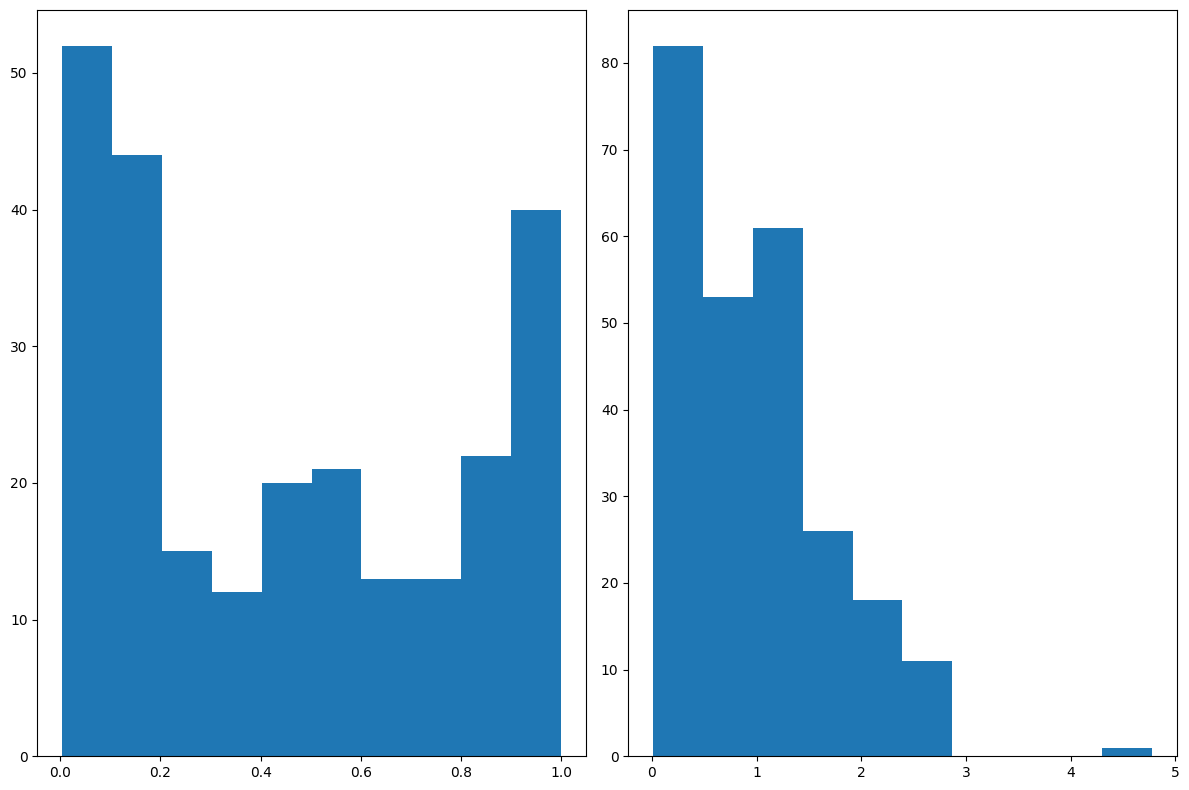

In [49]:
plt.figure(figsize=(12,8))

plt.subplot(121)
plt.hist(np.array(rmses).flatten())
plt.subplot(122)
plt.hist(np.array(maxes).flatten())

plt.tight_layout()
plt.show()

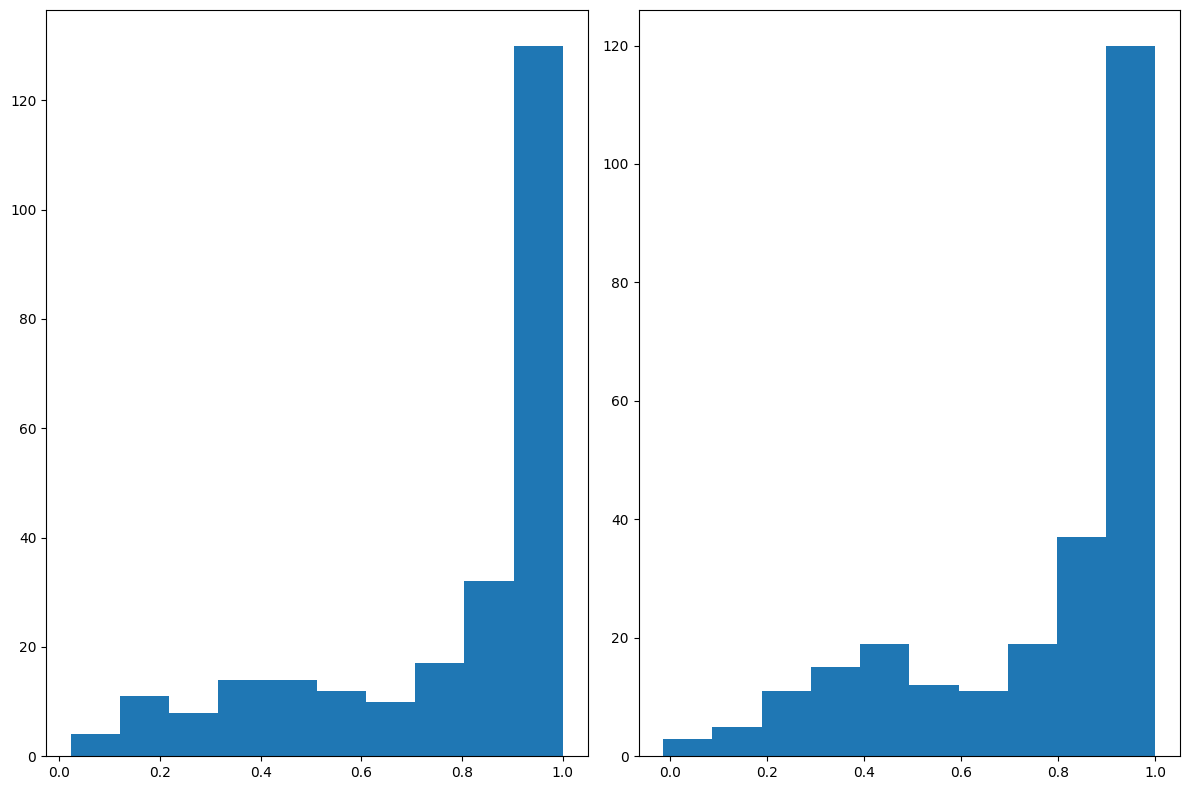

In [50]:
plt.figure(figsize=(12,8))

plt.subplot(121)
plt.hist(np.array(correlations)[:,0].flatten())
plt.subplot(122)
plt.hist(np.array(correlations)[:,1].flatten())

plt.tight_layout()
plt.show()

In [51]:
puntuaciones = []

for vano in data:

    try:
        puntuaciones.append(vano["PUNTUACIONES"])
        
    except Exception:
        pass

puntuaciones_df = pd.DataFrame(puntuaciones)

print((puntuaciones_df["Reconstrucción"] == "Posible").sum()/puntuaciones_df.shape[0])
print((puntuaciones_df["Error polilínea"] > puntuaciones_df["Error nuestro ajuste"]).sum()/puntuaciones_df.shape[0])
print((puntuaciones_df["Output"] == "good_fit").sum()/puntuaciones_df.shape[0])

0.96
0.84
0.84


In [52]:
puntuaciones_df.describe().loc[["mean", "std", "max", "std"],:]

,Error polilínea,Error nuestro ajuste,Conductores identificados
mean,2.306916e+06,1.193859,3.520833
std,1.782017e+06,0.650203,1.685724
max,4.694515e+06,2.743084,7.000000
std,1.782017e+06,0.650203,1.685724


,Reconstrucción,Flag,Error polilínea,Error nuestro ajuste,Continuidad,Conductores identificados,Output
0,Posible,Tiene 3 o más conductores. Porcentaje de hueco...,39.932749,45.434766,full,3,good_fit


In [ ]:
res.loc[res.flag=='empty',:].shape

(1, 3)

In [ ]:
res.loc[res.flag=='bad_cluster',:].shape

(11, 3)

In [ ]:
res.loc[res.flag=='bad_backing',:]

,id,flag,line_number
13,G_13576748_13576812,bad_backing,0


In [ ]:
res.loc[res.flag=='good_fit',:].shape

(0, 3)

In [ ]:
from catenaria.notebooks.old_modules.modules_fit import *
import json
import os

pathdata2 = os.getcwd()+"/../data/lineas_completas/REG804.json"

with open(pathdata2, 'r') as archivo:
    data = json.load(archivo)
    
fulld=[data[i]['ID_VANO'] for i in range(len(data))]
res=fit_plot_vano_group(data,sublist=fulld,plot_filter='good_fit',init=0,end=len(fulld),save=True,label='REG')#len(fulld)

ModuleNotFoundError: No module named 'plotly'

In [ ]:
res.flag.value_counts()

flag
bad_cluster        87
bad_line_number    43
good_fit            9
empty               9
bad_backing         7
Name: count, dtype: int64

In [ ]:
res

NameError: name 'res' is not defined

In [ ]:
from catenaria.notebooks.old_modules.modules_fit import *
import json
import os

pathdata2 = os.getcwd()+"/../data/lineas_completas/XIN803.json"

with open(pathdata2, 'r') as archivo:
    data = json.load(archivo)
    

fulld=[data[i]['ID_VANO'] for i in range(len(data))]
res=fit_plot_vano_group(data,sublist=fulld,plot_filter=None,init=0,end=len(fulld),save=True,label='XIN')#len(fulld)
#'bad_line_number', "bad_backing", bad_cluster, bad_line_number, bad_line_orientation, bad_fit, good_fit, 


Processing Vano 0

Reference G_13645821_13645987
Umbral de corte superior detectado: 851254.4582811123
Number of lines: 3
(8040,)
[0 1 2]
(3,)

Processing Vano 1

Reference G_13645776_13645990
Umbral de corte inferior detectado: 4359432.5516279405
Umbral de corte superior detectado: 4359553.768260339
Number of lines: 3
(8546,)
[0 1 2]
(3,)

Processing Vano 2

Reference G_13645684_13645777
Umbral de corte inferior detectado: 251440.5701692517
Umbral de corte superior detectado: 251528.8044695908
Number of lines: 3
(5596,)
[0 1 2]
(3,)

Processing Vano 3

Reference G_13615863_13645824
Umbral de corte inferior detectado: -1043461.5826490528
Umbral de corte superior detectado: -1043410.1842453678
Number of lines: 3
(2878,)
[0 1 2]
(3,)

Processing Vano 4

Reference G_13645732_13645823
Umbral de corte inferior detectado: -1102312.024197021
Umbral de corte superior detectado: -1102159.7647004905
Number of lines: 3
(5945,)
[0 1 2]
(3,)

Processing Vano 5

Reference G_13499432_13645947
Umbral

/home/ubuntu-deduce/Projects/electra-ia/catenaria/notebooks/modules_fit.py:1102: RuntimeWarning: overflow encountered in cosh
  r=a * np.cosh((x - h) / a) + k


Number of lines: 3
(7305,)
[0 1 2]
(3,)

Processing Vano 81

Reference G_13597802_13645695
Umbral de corte inferior detectado: -4608989.422519232
Umbral de corte superior detectado: -4608786.053238494
Number of lines: 3
(6673,)
[0 1 2]
(3,)

Processing Vano 82

Reference G_13645789_13645916
Umbral de corte inferior detectado: -4609443.617692309
Umbral de corte superior detectado: -4609292.996995143
Number of lines: 3
(6045,)
[0 1 2]
(3,)

Processing Vano 83

Reference G_13645645_13645961
Umbral de corte superior detectado: 2332713.1473456793
Number of lines: 3
(7084,)
[0 1 2]
(3,)

Processing Vano 84

Reference G_13645844_13645845
Umbral de corte inferior detectado: -3638207.696426026
Umbral de corte superior detectado: -3638057.507208752
Number of lines: 3
(7277,)
[0 1 2]
(3,)

Processing Vano 85

Reference G_13645799_13645970
Umbral de corte inferior detectado: -4116335.2849874254
Umbral de corte superior detectado: -4116117.9422650244
Number of lines: 3
(7738,)
[0 1 2]
(3,)

Process

In [ ]:
from catenaria.notebooks.old_modules.modules_fit import *
import json
import os

pathdata2 = os.getcwd()+"/../data/lineas_completas/VDI711.json"

with open(pathdata2, 'r') as archivo:
    data = json.load(archivo)
    

fulld=[data[i]['ID_VANO'] for i in range(len(data))]
res=fit_plot_vano_group(data,sublist=fulld,plot_filter=None,init=0,end=len(fulld),save=True,label='VDI')#len(fulld)
#'bad_line_number', "bad_backing", bad_cluster, bad_line_number, bad_line_orientation, bad_fit, good_fit, 


Processing Vano 0

Reference C_13411888_13411889
Umbral de corte superior detectado: 2617144.872676384
Number of lines: 3

Processing Vano 1

Reference C_13412048_13412052
Umbral de corte inferior detectado: -3852391.868572913
Umbral de corte superior detectado: -3852312.239312542
Number of lines: 3

Processing Vano 2

Reference C_13412143_13412146
Umbral de corte superior detectado: 3910548.1512978827
Number of lines: 3

Processing Vano 3

Reference C_13412119_13412124
Umbral de corte inferior detectado: 3906191.4814983476
Umbral de corte superior detectado: 3906279.7072119163
Number of lines: 3

Processing Vano 4

Reference C_13412096_13412097
Umbral de corte inferior detectado: 3915462.50963112
Umbral de corte superior detectado: 3915544.4794009104
Number of lines: 3

Processing Vano 5

Reference C_13412120_13412145
Umbral de corte inferior detectado: 3919803.6859338717
Umbral de corte superior detectado: 3919897.814413377
Number of lines: 3

Processing Vano 6

Reference C_13412145

Recogida de ajustes y eliminación de outliers en parámetros

In [ ]:
import os
import json 
import numpy as np

pathdata2 = os.getcwd()+'/'+[el for el in os.listdir(os.getcwd()) if 'REG_resultado' in el][0]

with open(pathdata2, 'r') as archivo:
    data = json.load(archivo)

df_reg=data_catenaryparameters_to_df(data)


pathdata2 = os.getcwd()+'/'+[el for el in os.listdir(os.getcwd()) if 'VDI_resultado' in el][0]

with open(pathdata2, 'r') as archivo:
    data = json.load(archivo)

df_vdi=data_catenaryparameters_to_df(data)


pathdata2 = os.getcwd()+'/'+[el for el in os.listdir(os.getcwd()) if 'XIN_resultado' in el][0]

with open(pathdata2, 'r') as archivo:
    data = json.load(archivo)

df_xin=data_catenaryparameters_to_df(data)

0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1


In [ ]:
df_reg.shape

(155, 4)

In [ ]:
df_vdi.shape

(129, 4)

In [ ]:
df_xin.shape

(163, 4)

In [ ]:
df_reg=df_reg.dropna()
df_reg=df_reg.loc[df_reg['id'].isin(reg.to_list())]
df_vdi=df_vdi.dropna()
df_vdi=df_vdi.loc[df_vdi['id'].isin(vdi.to_list())]
df_xin=df_xin.dropna()
df_xin=df_xin.loc[df_xin['id'].isin(xin.to_list())]

In [ ]:
df_reg.shape

(65, 4)

In [ ]:
df_vdi.shape

(86, 5)

In [ ]:
df_xin.shape

(121, 4)

In [ ]:
df_reg=pretreatment_linegroup_from_json(df_reg)
df_vdi=pretreatment_linegroup_from_json(df_vdi)
df_xin=pretreatment_linegroup_from_json(df_xin)

In [ ]:
df_reg.shape

(45, 5)

In [ ]:
df_vdi.shape

(86, 5)

In [ ]:
df_xin.shape

(103, 5)